# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

#### Загрузить данные в датафрейм

In [ ]:
import pandas as pd # импортируем библиотеку pandas
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib для построения графиков
import numpy as np # импортируем библиотеку NumPy для использования отдельных методов

In [ ]:
# создаем датафрейм data на данных из файла
# предварительно установлено, что в качестве разделителя используется \t
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Изучить общую информацию о датафрейме

##### Изучение "сырых" данных

Для изучения "сырых" данных выведем на экран три среза:
    
1. первые строки файла командой head()
2. случайные строки файла командой sample()
3. последние строки файла командой tail()
    
Также изучим общую информацию о датафрейме командой info()

In [ ]:
data.head() # просмотр пяти верхних строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.sample(5) # просмотр пяти случайных строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15495,7,3800000.0,44.6,2016-05-31T00:00:00,1,2.60,8.0,20.0,1,NaN,...,12.3,NaN,Санкт-Петербург,16322.0,15118.0,1.0,507.0,0.0,NaN,934.0
10,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,...,8.5,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
12234,18,15499000.0,138.5,2018-08-20T00:00:00,4,2.80,9.0,118.5,8,NaN,...,20.0,4.0,Санкт-Петербург,40770.0,9461.0,2.0,468.0,0.0,NaN,91.0
13145,5,3650000.0,44.0,2014-12-11T00:00:00,2,NaN,5.0,NaN,2,NaN,...,NaN,0.0,Санкт-Петербург,35316.0,10526.0,0.0,NaN,1.0,419.0,579.0
13380,4,3503296.0,50.0,2018-03-30T00:00:00,2,NaN,23.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,22089.0,17417.0,0.0,NaN,1.0,136.0,45.0


In [ ]:
data.tail() # просмотр пяти нихних строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info() # вывод информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

##### Выводы

<b>Предварительные выводы и замечания:</b>
    
1. В колонках cityCenters_nearest, parks_around3000 и ponds_around3000 необходимо исправить наименование колонок и привести к единому стандарту.
2. Колонка last_price тип данных float64, но по предварительным срезам, такое ощущение, что можно поставить int - не увидел ни одного lдробного значения. Кроме того, если цены в рублях, их традиционно указывают в качестве целых чисел, копейками при продаже недвижимости никто на практике не пользуется. Использование типа float кажется нецелесообразным.
3. Колонка first_day_exposition тип данных object, необходимо привести к типу datetime и разметить формат. Поскольку речь о недвижимости в Санкт-Петербурге, то есть в России, используется стандартный европейский формат: гггг-мм-дд по стандарту ISO 8601.
4. В колонке ceiling_height (высота потолков) имеются пропуски - это аномалия, высота потолков не может быть отсутствующей величиной или 0 величиной. Необходимо изучить причины пропусков. Возможно имеет смысл заполнить пропуски по аналогии с такими же объявлениями (похожие признаки дома).
5. Колонка floors_total тип данных float64, количество этаже в доме не может быть дробным, необходимо использовать формат int. Использование типа float нецелесообразно.
6. В колонке living_area (жилая площадь) имеются пропуски - это аномалия, жилая площадь не может быть отсутствующей или 0 величиной.
7. В колонке is_apartment (апартаменты) тип данных object и имеются пропуски. При этом и по вводным условиям здесь должен быть тип данных bool, и предварительно кажется, что в пропусках должно быть значение True. Но эта гипотеза требует проверки, отсутствующие значения необходимо заполнить соответствующими.
8. В колонке kitchen_area имеются пропуски. Такое в теории возможно в квартирах студиях или при совмещении кухонной и гостиной зон. Необходимо отдельно исследовать данные в этой колонке, для установления причин пропусков.
9. В колонке balcony (число балконов) имеются пропуски, это могут быть естественные причины - отсутствие балконов в квартире. Кроме того тип данных float64, поскольку речь идет о количестве а не о площади балконом, значени не может быть дробным, поэтому целесообразно использовать формат данных int.
10. Колонка locality_name содержит небольшое количество пропусков. Необходимо проверить причины пропуска значений. Возможно строками с пропусками этих данных можно пренебречь, из-за небольшого количества (49 записей) и строки удалить, либо оставить, если эти пропуски не влияют на итоговые расчеты.
11. Пропуски в колонках airports_nearest (рассточние до ближайшего аэропорта). Возможно причины аномальные и можно заполнить данными по аналогии с уже имеющимися в похожих населенных пунктах. Необходимо отдельно исследовать причины пропусков.
12. Пропуски в колонке cityCenters_nearest (расстояние до центра города). Необходимо исследовать причины пропусков. Возможно они естественные и присутствуют исключительно в пригородных населенных пунктах или в части населенных пунктах, либо причины аномальные и нужно принять решение о заполнении данных.
13. Пропуски в колонке parks_around3000 (число парков в радиусе 3км). Скорее всего причины пропусков естственные, и можно заполнить 0 значением. Кроме того тип данных float64, поскольку речь идет о количестве, а не о расстоянии, значение не может быть дробным, поэтому целесообразно использовать формат данных int.
14. Пропуски в  колонке parks_nearest (расстояние до ближайшего парка). Возможно причины пропусков связаны с отсутствием поблизости парков, необходимо детально исследовать причины пропусков.
15. Пропуски в колонке ponds_around3000 (число водоёмов в радиусе 3 км). Скорее всего причины пропусков естственные, и можно заполнить 0 значением. Кроме того тип данных float64, поскольку речь идет о количестве, а не о расстоянии, значение не может быть дробным, поэтому целесообразно использовать формат данных int.
16. Пропуски в колонке ponds_nearest (расстояние до ближайшего водоёма). Возможно причины пропусков связаны с отсутствием поблизости водоемов, необходимо детально исследовать причины пропусков.
17. Пропуски в колонке days_exposition (сколько дней было размещено объявление). Возможно причина естествнная - снятие объявления в день публикации, необходимо исследовать причины отсутствия значений. Возможно будет достаточно заполнить 0 значением. Кроме того тип данных float64, поскольку речь идет о количестве, а не о расстоянии, значение не может быть дробным, поэтому целесообразно использовать формат данных int.


##### Построение гистограммы для всех числовых столбцов датафрейме

<div class='alert alert-info'>
ИМХО, до предобработки данных, построение гистограммы не имеет большого смысла, кроме сравнения полученных графиков с очищенными данными. Такая гистограмма до преобработки малоинформативна. Но ок. Есть задача - выполняем задачу.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

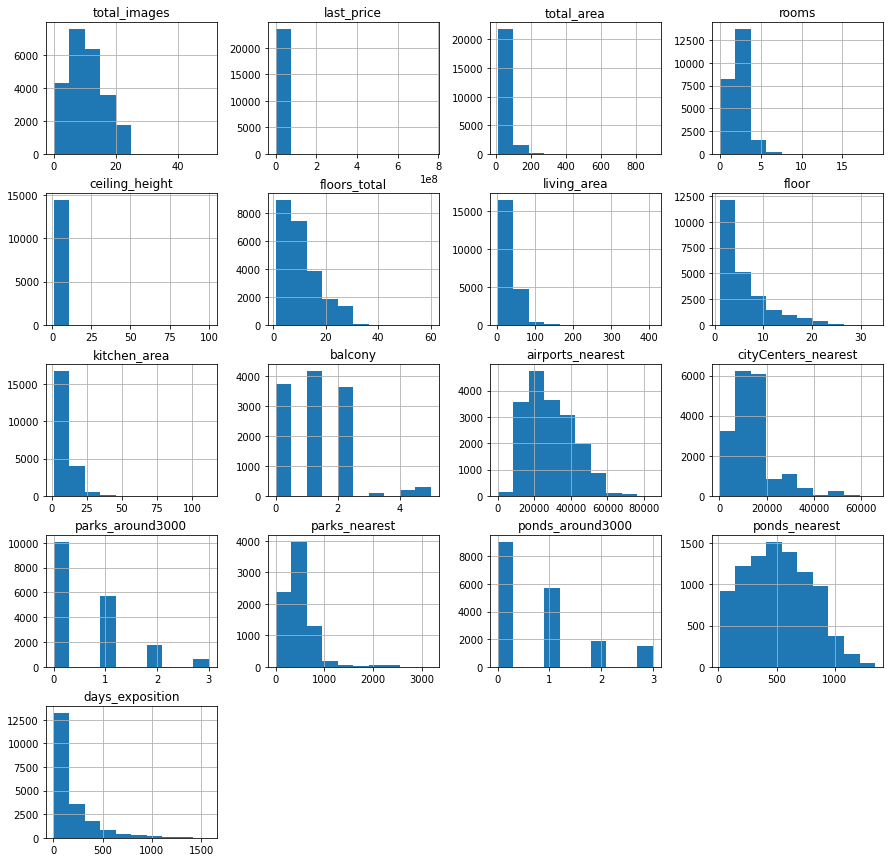

In [ ]:
data.hist(figsize=(15, 15))

### Выполните предобработку данных

#### Наведение порядка в имеющихся данных

##### Переименуем столбцы


Отдельно список столбцов выводить не стал, так как по info уже видны проблемы с названиями нескольких столбцов: использование верхнего регистра, слитное написание, без использования "змеиного" стиля

In [ ]:
# переименуем названия столбцов одной "пачкой"
data = data.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'ponds_around3000': 'ponds_around_3000',
        'parks_around3000': 'parks_around_3000',
    }
)

##### Проверим и удалим полные дубликаты

In [ ]:
data.duplicated().sum() # посмотрим на количество явных дубликатов

0

Дубликатов в датафрейме нет, так что смело переходим к следующему шагу

##### Приведем в порядок колонку first_day_exposition (дата публикации)

Дата публикации у нас имеет неверный формат, приведем в соответствующий форматы данные в столбце

In [ ]:
# преобразуем формат с помощью функции to_datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Заполнение пропусков

##### Информация об общем количестве пробелов

<div class='alert alert-info'>
Можно было бы просто ограничиться data.isna().sum() для изучения объема пробелов, но я хочу увидеть не просто сумму пробелов в столбцах, я хочу одновременно увидеть и процентное соотношение пробелов в столбце, чтобы увидеть насколько кричино их количество. Для этого необходимо создать переменную в которой будет храниться таблица с данными о сумме пробелов и их относительном количестве

In [ ]:
na_data = pd.DataFrame (columns=['sum', 'percent']) # создаем датафрейм с коронками суммы пропусков и иих процентного соотношения
na_data['sum'] = data.isna().sum() # колонке sum присваиваем значения суммы пропусков из data
na_data['percent'] = (na_data['sum'] / data.shape[0] * 100).round(2) # колонке percent присваиваем округленный до двух знаков после запятой результат расчета процента пропусков
na_data # выводим на экран полученную таблицу

,sum,percent
total_images,0,0.00
last_price,0,0.00
total_area,0,0.00
first_day_exposition,0,0.00
rooms,0,0.00
ceiling_height,9195,38.80
floors_total,86,0.36
living_area,1903,8.03
floor,0,0.00
is_apartment,20924,88.29


Из полученной таблицы значений видно, что в некоторых столбцах довольно существенный процент пропусков. Это подтверждает предварительные выводы из первого блока, а значит по каждому такому столбцу надо решать вопрос о заполнении данными. Заполнение данными начнем от простого к сложному, так как корректировки и группирока одних данных может повлиять на другие данные.

##### Заполним пропуски в days_exposition (сколько дней было размещено объявление)

Для начала посмотрим на список значений в столбце

In [ ]:
sorted(data['days_exposition'].unique())

[nan,
 1.0,
 2.0,
 3.0000000000000004,
 4.0,
 5.0,
 6.000000000000001,
 7.0,
 8.0,
 9.0,
 10.0,
 11.000000000000002,
 12.000000000000002,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.000000000000004,
 23.000000000000004,
 24.000000000000004,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.00000000000001,
 45.00000000000001,
 46.00000000000001,
 47.00000000000001,
 48.00000000000001,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.00000000000001,
 88.00000000000001,
 89.00000000000001,
 90.00000000000001,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0

В результате вывода уникальных значений видим, что:

1. Отсутствуют 0 значения, а значит все имеющиеся пропуски, это фактически и есть 0 значения, то есть ситуации, когда объявление было снято в день публикации (ошибочная публикация, передумал, решил переделать и т.п.), либо когда объявление еще не было снято, и счетчик не посчитал количество дней публикации. Так что заменяем пропуски 0.
2. После сортировки появляются странные значения с большим количеством нулей после запятой, но это, как я понял по публикациям в сети, проблема функции sorted.

In [ ]:
# заполняем пропуски нулями и сразу меняем формат на цельночисленный
data['days_exposition'] = data['days_exposition'].fillna(0).astype(int)

#####  Заполнение пропусков floors_total (всего этажей в доме)

Кажется, что причиной отсутствия этажей в доме может быть одноэтажная застройка, то есть данные могли быть не указаны, если в доме нет этажности как таковой. В итоге можно было бы заполнить данные единицами ("1"). Однако количество этажей в доме не может быть меньше значения этажа квартиры. Поэтому посмотрим какие значения были указаны в значении этажа в доме, в тех строках, где отсутствует значение этажа. Благо, таких строк немного.

In [ ]:
# выведем на экран строки с пропусками в колонке floors_total
data.loc[(data['floors_total'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49
237,4,2438033.0,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251
457,4,9788348.0,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727
671,4,6051191.0,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123
1757,5,3600000.0,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512
22656,4,4574160.0,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127
22808,0,14569263.0,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260
23590,0,21187872.0,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104


Из полученного среза видно, что в тех строках, где отсутствует значение общего количества этажей в доме, этаж квартиры указан и он часто выше 1-го. Значит гипотеза об одноэтажной застройке не подтверждена. Поскольку способа как-то достоверно или хотя бы примерно установить общее количество этаже в таких домах не представляется возможным, а общая доля таких пропусков менее 1%, имеет смысл просто удалить такие строки, как не влияющие на общую выборку.

In [ ]:
# удаляем из датафрейма строки с пропусками в колонке floors_total
data = data.dropna(subset=['floors_total'])

##### Заполнение пропусков balcony (количество балконов)

Ранее уже была высказана гипотеза, что пропуски в количестве балконов, скорее всего означают их отсутствие. Для проверки гипотезы снова посмотрим какие значения в этой колонке есть и какое их количество

In [ ]:
# выведем на экран количество записей сгруппированных по количеству балконов
data['balcony'].value_counts()

1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Мы видим, что в колонке присутствуют нулевые значения, их довольно много, хоть и меньше, чем 1. Мы понимаем, что количество балконов зависит от дома и архитектруного проекта (иногда отсутствуют балконы на первых этажах, иногда на последних, а иногда они есть и там и там). Достоверно установить количество балконов мы не можем. Но учитывая тот факт, что этот параметр заполнялся вручную, можно предположить, с высокой долей вероятности, что он не был заполнен именно по причине отсутствия балкона в квартире. Поэтому, заполним отсутствующие значения нулями.

In [ ]:
# заполняем пропуски нулями и тоже меняем формат на цельночисленный
data['balcony'] = data['balcony'].fillna(0).astype(int)

##### Заполнение пропусков locality_name (название населённого пункта)

Можно предположить, что отсутствие название населенного пункта, вызвано тем, что пользователи априори подразумевают, что продается квартира в г. Санкт-Петербурге. Для проверки гипотезы посмотрим на удаленность от центра таких квартир

In [ ]:
# выведем на экран строки с пропусками в колонке названия населенного пункта отсротиированным по удаленности от центра
data.loc[(data['locality_name'].isna())].sort_values(by='city_centers_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
16610,11,11940000.0,112.00,2015-11-19,3,3.00,5.0,64.00,2,NaN,...,23.00,0,NaN,21219.0,1322.0,1.0,740.0,3.0,365.0,319
22474,7,24000000.0,128.00,2015-07-24,4,2.75,6.0,68.40,6,False,...,16.50,0,NaN,23297.0,1780.0,3.0,277.0,3.0,561.0,436
4189,7,9200000.0,80.00,2015-12-10,3,4.00,4.0,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223
19045,6,4650000.0,48.00,2016-01-25,2,3.12,5.0,26.20,1,False,...,8.00,0,NaN,21654.0,3312.0,1.0,549.0,1.0,858.0,254
9821,13,8000000.0,94.50,2015-01-21,4,3.00,2.0,57.80,2,NaN,...,11.30,0,NaN,24953.0,3801.0,1.0,375.0,2.0,532.0,531
4151,17,17600000.0,89.50,2014-12-09,2,3.00,8.0,39.62,7,NaN,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869
8568,10,16000000.0,155.00,2016-05-09,3,NaN,6.0,94.00,3,NaN,...,23.00,0,NaN,24233.0,4065.0,1.0,547.0,0.0,NaN,248
11248,12,6300000.0,63.10,2015-01-16,4,NaN,8.0,44.00,7,NaN,...,8.70,0,NaN,25221.0,4069.0,0.0,NaN,2.0,653.0,551
1097,3,8600000.0,81.70,2016-04-15,3,3.55,5.0,50.80,2,NaN,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147
20057,13,11500000.0,102.00,2015-10-14,2,NaN,5.0,70.00,2,NaN,...,NaN,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,325


Мы видим, что удаленность таких квартир есть как в пределах 18 км (условный радиус основной части Санкт-Петербурга, без учета пригорода), так и свыше этого радиуса.
По идее можно было бы заполнить пропуски значениями из колонок с соответствующим радиусом, где имеются значения названия населенного пункта. Но учитывая, что общая доля пропусков в колонке locality_name менее 1%, проще просто удалить эти строки - заполнение этих пропусков существенно не повлияет на анализ выборки.

In [ ]:
 # удаляем из датафрейма строки с пропусками в колонке locality_name
data = data.dropna(subset=['locality_name'])

Поскольку данные о населенном пункте заполнялись пользователями вручную, это неизбежно должно было привести к неявным дубликатам из-за разного подхода к написанию населенного пункта и возможных опечаток

In [ ]:
# выведем на экран список названий населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим, что у нас большое количество неявных дубликатов, от использования буквы Ё, до разного написания одного и того же населенного пункта. Самым оптимальным способом будет удалить из строк ненужные слова - таких вариантов меньше, чем названий населенных пунктов, поэтому проще удалить лишнее, чем переименовывать каждый населенный пункт.

In [ ]:
# сперва создаем список значений которые мы будем искать и удалять из названий населенных пунктов
del_name = ['посёлок\s',
            'поселок\s',
            'деревня\s',
            'городской\s',
            'городского\s',
            'типа\s',
            'садовое\s',
            'товарищество\s',
            'село\s',
            'имени\s',
            'станции\s',
            'садоводческое\s',
            'некоммерческое\s',
            'при\s',
            'железнодорожной\s',
            'станции\s',
            'коттеджный\s']
# запускаем цикл перебора слов в списке del_name и удаления этого слова в колонке locality_name
for d in del_name:
    data['locality_name'] = data['locality_name'].replace(d, '', regex=True)
# выведем на экран отсортированный получившийся спикок названий для проверки
sorted(data['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

В итоге все лишние слова почистили, от неявных дубликатов избавились, остались только наименования населенных пунктов.

##### Заполнение пропусков is_apartment (является ли аппартаментами)

Аппартаменты это по сути нежилая квартира, гостиница квартирного типа. Те кто продают аппартаменты однозначно знают что это такое. Априори, те кто продают жилые квартиры, скорее всего не указывают никакого значения в этой колонке, так как точно знают, что продают не аппартаменты. Поэтому самое логичное, заполнить все пропуски значнием False

In [ ]:
# заполним значениями False пропуски в колонке is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)

##### Заполнение пропусков в parks_around_3000	(число парков в радиусе 3 км) и ponds_around_3000 (число прудов в радиусе 3 км)

На самом деле эти оба показателя очень похожи, имеют одинаковую логику формирования и одинаковые причины пропусков. Поэтому и заполнять их будем вместе по одной логике.
    
Отсутствие значений в этих колонках, означает отсутствие парков в округе. Таким образом мы смело можем заполнить пропущенные значения нулями

In [ ]:
# заполним нулями пропуски в колонках parks_around_3000 и ponds_around_3000
data[['parks_around_3000', 'ponds_around_3000']] = data[['parks_around_3000', 'ponds_around_3000']].fillna(0).astype(int)

##### Заполнение пропусков в living_area (жилая площадь)

Значение жилой площади не может быть пустым или нулевым. Однако мы можем сделать расчет, на основании медианных или средних значений аналогичных по количеству комнат квартир.

In [ ]:
# выведем на экран распределение пропусков в колонке living_area в зависимости от количества комнат
data.loc[(data['living_area'].isna())]['rooms'].value_counts()

1    646
2    632
3    440
4     90
5     33
0     11
6      6
7      6
9      1
Name: rooms, dtype: int64

Мы видим, что пропуски значения в колонке living_area есть только в квартирах с количеством комнат от 0 до 6, 7 и 9. В остальных квартирах пропусков нет. Сответственно, нам необходимо вычислить возможное значение жилых площадей именно для квартир с таким количеством комнат. Но чтобы понять каким значением, средним или медианным заполнять пропуски необходимо построить диаграмму рассеивания.

<AxesSubplot:xlabel='rooms', ylabel='living_area'>

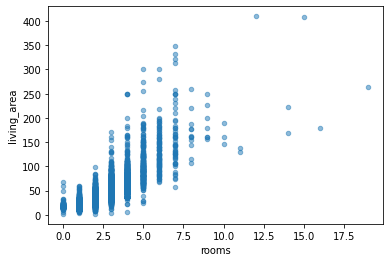

In [ ]:
# построим диаграмму рассеивания для значений количества комнат и жилой площади
data.plot(x='rooms', y='living_area', kind='scatter', alpha=0.5)

Мы видим, что в исследуемом массиве, интересующих нас по количеству комнат квартир, есть выбросы, и смещенная плотность, поэтому будем заполнять данные медианным значеним по квартирам с аналогичным количеством комнат. Для этого нужно будет сделать заполнение по циклу с перебором значений комнат и определеним медианы для каждого типа квартир по количеству комнат. Поскольку в квартирах с количеством комнат более 9 у нас нет пропусков, фактически цикл для этих квартир срабатывать не будет.
Подобный способ заполнения мы уже использовали в прошлом проекте.

In [ ]:
# запускаем цикл для определения уникальных значений количества комнат и заполнения медианным значением
for d in data['rooms'].unique():
    data.loc[(data['rooms'] == d) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == d), 'living_area'].median()

In [ ]:
data['living_area'].isna().sum() # проверим, что все заполнилось корректно

0

##### Заполнение пропусков в kitchen_area (площадь кухни)

Наличие пропусков в площади кухни может объясняться несколькими причинами:

1. Отсутствие выделенной кухонной зоны: квартиры-студии, квартиры евростандарта (кухня совмещается с гостиной зоной, которая традиционно в России считается жилой зоной).
2. Человеческим фактором. Отсутствие значений в таких квартирах, может произойти потому, что пользователь просто не указал эти данные или не знал их.

Для заполения пропусков, также надо учитывать, что в квартирах со стандартной планировкой, еще по советским СНиПам, площать кухни зависела от количества комнат в квартире. В современных квартирах, такой зависисмости нет (кроме минимальных значений).

Учитывая, что общая доля пропусков менее 10%, скорее всего речь идет именно о студия и квартирах евростандарта. Поэтому оптимальным будет замена значения на нулевое

In [ ]:
# заполним нулями пропуски в колонке kitchen_area
data['kitchen_area'] = data['kitchen_area'].fillna(0)

##### Заполнение пропусков ponds_nearest, parks_nearest и airports_nearest

Указанные колонки должны были заполниться автоматически на основе картографических дванных. Поскольку в них присутствую пропуски, причина этих пропусков, скорее всего техническая, либо в выставленном для выгрузки радиусе отсутствую парки и пруды. Однако, учитывая что в обеих колнках количество пропусков одинаковое, то имеет место именно техническая ошибка выгрузки данных.

Тем не менее, поскольку изучение этих данных не входит в задачу, кроме parks_nearest, самым простым решением будет оставить все как есть и проигнорировать пропуски в этих колонках. Относительно колонки parks_nearest, самым оптимальным решением будет заполнить отсутствующие данные нулями, но не потому что тут 0 расстояние, а именно потому, что такого расстояния быть не может, и проще дальнейшую аналитику с этим показателем строить с исключением отсутствующих данных.

In [ ]:
# заполним нулями пропуски в колонке parks_nearest
data['parks_nearest'] = data['parks_nearest'].fillna(0)

##### Заполнение пропусков city_сenters_nearest (расстояние до центра)

Расстояния до центра города тоже собиралось автоматически из геосервисов. Однако у разных пригородных населенных пунктов расстояние до центра Санкт-Петербурга относительно одно (по крайне мере в рамках допустимого радиуса). Так что мы можем заполнить эти пропуски на основе уже имеющихся данных по разным населенным пунктам. Поскольку разброс значений в рамках одного насленного пункта может сильно различаться, оптимальным будет заполнение пропущенных значений медианными значениями по каждому населенному пункту.
    
Построим таблицу со списком медианных значений расстояния до центра для разных населенных пунктов

In [ ]:
data.groupby('locality_name')['city_centers_nearest'].median()

locality_name
Агалатово              NaN
Александровская    27468.0
Алексеевка             NaN
Аннино                 NaN
Аро                    NaN
                    ...   
Юкки                   NaN
Ялгино                 NaN
Яльгелево              NaN
Ям-Тесово              NaN
Янино-1                NaN
Name: city_centers_nearest, Length: 305, dtype: float64

После построения таблицы медианных значений, мы увидим, что у многих населенных пунктов в пригороде Санкт-Петербурга, в принципе отсутствуют значения расстояния до центра. Этим можно объяснить пропуски - при автоматическом получении данных из геосервисов, эти населенные пункты не попали в радиус расчета расстояния от центра Санкт-Петербурга.

Поэтому дальнейшее заполнение данными мы построим в два этапа:
    
1. Заполним медианами в тех населенных пунктах, где это возможно
2. По принципу расчета длины вектора, на основе координат населенных пунктов, сделаем расчет растояния для тех населенных пунктов, где полностью отсутствуют данные о расстоянии.

<div class='alert alert-info'>
Теперь надо понять, верна ли гипотеза, что полностью пропущены значения расстояния до центра по определенным населенным пунктам, или есть и частичное заполнение. Для этого создадим таблицу с перечнем населенных пунктов и напротив каждого запишем количество строк с данными в этом населенном пункте, количество строк с заполненными данными и процент пропущенных значений, чтобы понять сколько строк содержат неполное заполнение. Эти пропуски мы и будем заполнять медианой.

In [ ]:
# построим таблицу с:
# 1. общим количеством строк в каждом населенном пункте - count_name,
# 2. количеством заполненный строк расстояния - count_data
# 3. процентным отношением пропусков расстояний в населенном пункте - na_percent

na_locality = pd.DataFrame(columns=['count_name', 'count_data', 'na_percent'])
na_locality['count_name'] = data.groupby('locality_name')['locality_name'].count()
na_locality['count_data'] = data.groupby('locality_name')['city_centers_nearest'].count()
na_locality['na_percent'] = ((na_locality['count_name'] - na_locality['count_data']) / na_locality['count_name']* 100).round(2)

In [ ]:
# выведем на экран получившуюся таблицу отсортированную по значению процента
na_locality.sort_values(by='na_percent', ascending=True)

,count_name,count_data,na_percent
locality_name,,,
Сапёрный,6,6,0.0
Левашово,1,1,0.0
Понтонный,20,20,0.0
Лисий Нос,3,3,0.0
Зеленогорск,24,24,0.0
...,...,...,...
Красная Долина,3,0,100.0
Котлы,1,0,100.0
Котельский,3,0,100.0


Мы видим, что лишь у небольшого количества населенных пунктов полностью заполнены данные расстояния до центра, у некоторого количества есть небольшая доля пропусков и у большей части населенных пунктов данные о расстоянии отсутствуют.
Предварительная гипотеза, что данные не были заполнены из-за выхода населенных пунктов из радиуса расчета, не подтвердилась. Налицо самая настоящая техническая проблема выгрузки геоданных.

In [ ]:
data['city_centers_nearest'].isna().sum() # посчитаем число пропусков для контрольного сравнения

5501

<div class='alert alert-info'>
Изначально хотел решить проблему запуском цикла, как в случае с определением жилой площади:
    
    for n in data['locality_name'].unique():
    data.loc[(data['locality_name'] == n) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == n), 'city_centers_nearest'].median()
    
Но такой подход выдает ошибку, так как расчет медианы пытается поделить NaN на NaN, то есть произвести деление на 0.
Можно было бы внедрить игнорирование ошибки, но я не любитель такого подхода, поэтому буду использовать чуть более костыльный, но рабочий вариант с преднастроенным списком значений  для служебной переменной n. Можно было бы конечно внедрить дополнительную группировку, но это тоже не имеет смысла, потому что она не будет участвовать в итоговой аналитике, а нужна исключительно для служебных целей - заполнения пропусков.

Мы знаем, что частичное заполнение данными есть у небольшого количества населенных пунктов. Поэтому, для использования в цикле, создадим переменную с перечислением именно этих названий городов. А затем запустим цикл с подстановкой медианы вместо пропущенных значений.

In [ ]:
# создаем список с названиями населенных пунктов, в которых требуется заполнение мелианами
pre_locality_name = ['Пушкин',
                     'Колпино',
                     'Санкт-Петербург',
                     'Шушары',
                     'Ломоносов',
                     'Кронштадт',
                     'Красное Село']
# запускаем цикл с перебором по значению из списка и заполнению пропуском медианой
for n in pre_locality_name:
    data.loc[(data['locality_name'] == n) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = \
    data.loc[(data['locality_name'] == n), 'city_centers_nearest'].median()

In [ ]:
data['city_centers_nearest'].isna().sum() # контрольная проверка

5432

По сократившемуся числу пропусков видим, что данные успешно заполнены, переходим к следующему шагу - заполнение пропущенных данных по населенным пунктам, где нет ни единой записи об удаленности от центра. Напомню, что для этого мы будем использовать подход на базе расчета длины вектора по имеющимся координатам.

Для этого нам надо будет:

1. Создать локальный датафрейм со значениями координат всех населенных пунктов для вычисления расстояния
2. Рассчитать длину вектора от координат Санкт-Петербурга до координат нужного населенного центра
3. Подставить значение длины вектора в пропущенных данных колонки city_centers_nearest
    
В идеале такие датафреймы нужно выносить во внешние файлы, но, поскольку у нас учебная работа, для наглядности создадим отдельный датафрейм, в котором будем производить расчеты и из которого будем забирать данные в основной датафрейм. Значения координат заранее собраны по данным из Яндекс карт уже пересчитанные до градусов.

In [ ]:
town_coord = pd.DataFrame([['Агалатово', 60.215465, 30.304927],
                           ['Алексеевка', 59.434711, 28.777764],
                           ['Аннино', 59.771581, 30.052132],
                           ['Аро', 59.927112, 30.655350],
                           ['Барышево', 60.692386, 29.591583],
                           ['Батово', 59.318935, 29.900047],
                           ['Бегуницы', 59.585060, 29.304940],
                           ['Белогорка', 59.348938, 30.133528],
                           ['Бокситогорск', 59.473576, 33.847675],
                           ['Большая Вруда', 59.406250, 29.241393],
                           ['Большая Ижора', 59.945657, 29.569368],
                           ['Большая Пустомержа', 59.386303, 28.886316],
                           ['Большие Колпаны', 59.525940, 30.072074],
                           ['Большое Рейзино', 59.597208, 30.054800],
                           ['Большой Сабск', 59.135878, 29.006547],
                           ['Бор', 59.945170, 30.681006],
                           ['Борисова Грива', 60.095520, 30.968063],
                           ['Бугры', 60.068722, 30.393806],
                           ['Будогощь', 59.285569, 32.446133],
                           ['Ваганово', 60.087219, 31.019824],
                           ['Важины', 60.963010, 34.025722],
                           ['Вартемяги', 60.181920, 30.322426],
                           ['Вахнова Кара', 60.472879, 33.102514],
                           ['Вещево', 60.730914, 29.180101],
                           ['Виллози', 59.697819, 30.105258],
                           ['Вознесенье', 61.010332, 35.482466],
                           ['Возрождение', 60.860716, 28.963949],
                           ['Войсковицы', 59.521358, 29.968552],
                           ['Войскорово', 59.690008, 30.561243],
                           ['Володарское', 58.522185, 29.88543],
                           ['Волосово', 59.447275, 29.484819],
                           ['Волхов', 59.900543, 32.352681],
                           ['Всеволожск', 60.024626, 30.645873],
                           ['Выборг', 60.710496, 28.749781],
                           ['Вырица', 59.413893, 30.347228],
                           ['Выскатка', 59.020417, 28.183573],
                           ['Высокоключевой', 59.470523, 30.099482],
                           ['Высоцк', 60.625604, 28.568277],
                           ['Гаврилово', 60.590917, 29.040413],
                           ['Гарболово', 60.340693, 30.496052],
                           ['Гатчина', 59.568410, 30.122892],
                           ['Гладкое', 59.644145, 30.856798],
                           ['Глажево', 59.652266, 32.117116],
                           ['Глебычево', 60.453845, 28.719194],
                           ['Глинка', 59.682228, 30.502709],
                           ['Гончарово', 60.701620, 28.939389],
                           ['Горбунки', 59.816789, 29.980743],
                           ['Гостилицы', 59.746328, 29.624731],
                           ['Громово', 60.696922, 30.216793],
                           ['Дзержинского', 58.666508, 29.890174],
                           ['Дружная Горка', 59.281717, 30.122308],
                           ['Дружноселье', 59.319073, 30.071113],
                           ['Дубровка', 59.845130, 30.933029],
                           ['Елизаветино', 59.491996, 29.776241],
                           ['Ефимовский', 59.497578, 34.670757],
                           ['Жилгородок', 59.561504, 29.471874],
                           ['Жилпосёлок', 59.507191, 29.780017],
                           ['Житково', 60.690994, 29.329635],
                           ['Заводской', 60.312064, 30.491471],
                           ['Заклинье', 58.725836, 29.898529],
                           ['Заневка', 59.937350, 30.514270],
                           ['Запорожское', 60.572381, 30.514378],
                           ['Зимитицы', 59.549517, 29.117147],
                           ['Ивангород', 59.376490, 28.219712],
                           ['Извара', 59.353214, 29.524048],
                           ['Ильичёво', 60.268080, 29.751591],
                           ['Иссад', 60.060774, 32.349834],
                           ['Калитино', 59.410207, 29.645949],
                           ['Каложицы', 59.424885, 29.040719],
                           ['Кальтино', 59.979889, 30.659258],
                           ['Каменногорск', 60.950810, 29.130882],
                           ['Камышовка', 60.431967, 29.064713],
                           ['Каськово', 59.622705, 29.502821],
                           ['Келози', 59.660408, 29.830203],
                           ['Кивеннапа Север', 60.347483, 29.757314],
                           ['Кикерино', 59.462006, 29.630741],
                           ['Кингисепп', 59.378053, 28.601209],
                           ['Кингисеппский', 59.403383, 28.571920],
                           ['Кипень', 59.684672, 29.851008],
                           ['Кириши', 59.449695, 32.008716],
                           ['Кировск', 59.875330, 30.981457],
                           ['Кирпичное', 60.468631, 29.366690],
                           ['Кисельня', 60.006062, 32.140517],
                           ['Кобралово', 59.586163, 30.397750],
                           ['Кобринское', 59.426286, 30.121886],
                           ['Колтуши', 59.932996, 30.655306],
                           ['Коммунар', 59.621609, 30.393483],
                           ['Коммунары', 60.904179, 30.077159],
                           ['Кондратьево', 60.633296, 28.160819],
                           ['Копорье', 59.704234, 29.048732],
                           ['Коркино', 59.294563, 31.200376],
                           ['Корнево', 60.053831, 30.743394],
                           ['Коробицыно', 60.518987, 29.725423],
                           ['Котельский', 59.582300, 28.752773],
                           ['Котлы', 59.605222, 28.755432],
                           ['Красная Долина', 60.359157, 28.988131],
                           ['Красносельское', 60.540956, 29.490038],
                           ['Красный Бор', 59.680974, 30.674673],
                           ['Кривко', 60.583330, 30.258115],
                           ['Кудрово', 59.908489, 30.513578],
                           ['Кузнечное', 61.124369, 29.880455],
                           ['Кузьмолово', 60.122286, 30.499358],
                           ['Кузьмоловский', 60.109455, 30.495073],
                           ['Курковицы', 59.425187, 29.668129],
                           ['Куровицы', 59.391009, 30.138999],
                           ['Куттузи', 59.756025, 30.066954],
                           ['Лаврики', 60.074123, 30.448406],
                           ['Лаголово', 59.705341, 30.020960],
                           ['Лампово', 59.291640, 30.067888],
                           ['Лебяжье', 59.961453, 29.418694],
                           ['Ленинское', 60.226798, 29.851448],
                           ['Лесколово', 60.271793, 30.463641],
                           ['Лесная Поляна', 60.177401, 30.112885],
                           ['Лесное', 60.380048, 30.202052],
                           ['Лесогорский', 61.090656, 28.905298],
                           ['Лодейное Поле', 60.734547, 33.545886],
                           ['Лопухинка', 59.730343, 29.411507],
                           ['Луга', 58.735207, 29.847945],
                           ['Лужайка', 60.806211, 28.482119],
                           ['Лукаши', 59.592964, 30.301765],
                           ['Лупполово', 60.153823, 30.270216],
                           ['Любань', 59.349301, 31.248580],
                           ['Малая Романовка', 60.036133, 30.727018],
                           ['Малое Верево', 59.613057, 30.166631],
                           ['Малое Карлино', 59.723443, 30.268275],
                           ['Малые Колпаны', 59.541371, 30.082297],
                           ['Мануйлово', 59.376265, 28.855459],
                           ['Мга', 59.757611, 31.061784],
                           ['Мельниково', 60.922527, 29.761670],
                           ['Меньково', 59.425032, 30.031902],
                           ['Мины', 59.422244, 30.397372],
                           ['Мистолово', 60.119359, 30.407101],
                           ['Мичуринское', 60.564878, 29.871876],
                           ['Молодцово', 59.826216, 31.102190],
                           ['Морозова', 59.974581, 31.034969],
                           ['Мурино', 60.051284, 30.438578],
                           ['Мыза-Ивановка', 59.607430, 30.079297],
                           ['Назия', 59.842377, 31.586840],
                           ['Ненимяки', 60.350180, 30.383215],
                           ['Нижние Осельки', 60.221083, 30.433197],
                           ['Нижняя', 59.679716, 30.098072],
                           ['Низино', 59.833312, 29.875640],
                           ['Никольский', 60.917232, 34.069065],
                           ['Никольское', 59.704574, 30.786810],
                           ['Новая Ладога', 60.106401, 32.316183],
                           ['Новая Ропша', 59.711623, 29.832862],
                           ['Новогорелово', 59.790480, 30.166236],
                           ['Новое Девяткино', 60.057325, 30.476370],
                           ['Новолисино', 59.563929, 30.766921],
                           ['Новоселье', 59.809048, 30.077563],
                           ['Новый Свет', 59.557665, 30.196060],
                           ['Новый Учхоз', 59.543150, 29.935459],
                           ['Нурма', 59.557825, 31.020803],
                           ['Оредеж', 58.816134, 30.333942],
                           ['Оржицы', 59.752553, 29.711850],
                           ['Отрадное', 59.774090, 30.794553],
                           ['Павлово', 59.808260, 30.879282],
                           ['Пансионат Зелёный Бор', 58.698387, 29.826942],
                           ['Парицы', 59.536270, 30.038325],
                           ['Паша', 60.393214, 33.018306],
                           ['Пельгора', 59.448601, 31.242929],
                           ['Пеники', 59.916830, 29.642042],
                           ['Первомайское', 60.358241, 29.738269],
                           ['Перово', 60.680884, 28.950213],
                           ['Петровское', 60.634213, 30.139825],
                           ['Пижма', 59.501314, 30.167871],
                           ['Пикалёво', 59.512684, 34.177483],
                           ['Пикколово', 59.699726, 30.137705],
                           ['Платформа 69-й километр', 60.509943, 30.229809],
                           ['Плодовое', 60.838934, 30.151494],
                           ['Плоское', 58.822862, 29.955464],
                           ['Победа', 60.352206, 29.440083],
                           ['Подпорожье', 60.912097, 34.167952],
                           ['Поляны', 60.320985, 29.255892],
                           ['Почап', 58.806152, 30.377295],
                           ['Починок', 60.971765, 30.189026],
                           ['Приветнинское', 60.186618, 29.417463],
                           ['Пригородный', 59.538533, 30.140445],
                           ['Приладожский', 59.876391, 31.328189],
                           ['Приморск', 60.366014, 28.613561],
                           ['Приозерск', 61.035979, 30.115589],
                           ['Пудомяги', 59.603838, 30.332235],
                           ['Пудость', 59.616298, 30.041693],
                           ['Пустынка', 59.660699, 30.812223],
                           ['Путилово', 59.870614, 31.455911],
                           ['Пушное', 60.406383, 29.470994],
                           ['Пчева', 59.565835, 32.107181],
                           ['Пчевжа', 59.355278, 32.351693],
                           ['Рабитицы', 59.405059, 29.388250],
                           ['Разбегаево', 59.789910, 29.929449],
                           ['Раздолье', 60.576373, 30.152995],
                           ['Разметелево', 59.904347, 30.673308],
                           ['Рапполово', 60.161753, 30.439404],
                           ['Рахья', 60.090737, 30.838930],
                           ['Реброво', 60.062499, 32.588651],
                           ['Рождествено', 59.323866, 29.948906],
                           ['Романовка', 60.045682, 30.701461],
                           ['Ромашки', 60.718233, 29.806218],
                           ['Ропша', 59.729413, 29.862390],
                           ['Рощино', 60.256511, 29.603100],
                           ['Русско', 58.989066, 28.490213],
                           ['Русско-Высоцкое', 59.697342, 29.941980],
                           ['Рябово', 60.338124, 28.990898],
                           ['Садко', 59.770018, 31.155380],
                           ['Сапёрное', 60.713035, 29.962606],
                           ['Свердлова', 59.798149, 30.636603],
                           ['Светогорск', 61.113731, 28.865879],
                           ['Свирь', 59.698277, 33.048202],
                           ['Свирьстрой', 60.799715, 33.729026],
                           ['Севастьяново', 61.055393, 29.793085],
                           ['Селезнёво', 60.756756, 28.619328],
                           ['Сельцо', 59.626814, 29.535816],
                           ['Семиозерье', 60.319430, 29.297448],
                           ['Семрино', 59.541503, 30.388847],
                           ['Серебрянский', 58.580277, 29.612748],
                           ['Сертолово', 60.143531, 30.217179],
                           ['Сиверский', 59.354888, 30.067071],
                           ['Сижно', 59.084790, 28.213505],
                           ['Синявино', 59.907816, 31.072600],
                           ['Сланцы', 59.117790, 28.088145],
                           ['Снегирёвка', 60.553848, 30.297668],
                           ['Советский', 60.531140, 28.668151],
                           ['Совхозный', 59.504840, 34.286035],
                           ['Сосново', 60.557705, 30.253624],
                           ['Сосновый Бор', 59.904225, 29.092264],
                           ['Старая', 59.930241, 30.624574],
                           ['Старая Ладога', 59.998936, 32.295800],
                           ['Старая Малукса', 59.637623, 31.370508],
                           ['Старая Пустошь', 59.976058, 30.687842],
                           ['Старое Хинколово', 59.469014, 29.915615],
                           ['Старополье', 59.043834, 28.590321],
                           ['Старосиверская', 59.369476, 30.086115],
                           ['Старые Бегуницы', 59.591679, 29.324784],
                           ['Стеклянный', 60.385144, 30.238891],
                           ['Суйда', 59.464603, 30.121796],
                           ['Сумино', 59.472530, 29.482950],
                           ['Суоранда', 59.944269, 30.610965],
                           ['Суходолье', 60.714360, 30.033330],
                           ['Счастье', 59.670597, 30.524277],
                           ['Сяськелево', 59.551168, 29.843237],
                           ['Сясьстрой', 60.137057, 32.561279],
                           ['Тайцы', 59.662913, 30.113873],
                           ['Тарасово', 60.262550, 29.312243],
                           ['Тельмана', 59.722386, 30.612824],
                           ['Терволово', 59.668080, 29.898134],
                           ['Терпилицы', 59.486989, 29.362495],
                           ['Тёсово-4', 58.799500, 30.565851],
                           ['Тихвин', 59.644213, 33.542105],
                           ['Тихковицы', 59.416223, 29.953461],
                           ['Тойворово', 59.563396, 29.872055],
                           ['Токсово', 60.149716, 30.512231],
                           ['Торковичи', 58.855706, 30.344857],
                           ['Торосово', 59.517875, 29.565227],
                           ['Торошковичи', 58.567438, 30.113657],
                           ['Торфяное', 59.547829, 30.170000],
                           ['Тосно', 59.541179, 30.875006],
                           ['Трубников Бор', 59.264543, 31.395023],
                           ['Углово', 60.069180, 30.737708],
                           ['Ульяновка', 59.636168, 30.757929],
                           ['Усть-Луга', 59.657676, 28.266640],
                           ['Ушаки', 59.516081, 30.900878],
                           ['Фалилеево', 59.537739, 28.933415],
                           ['Фёдоровское', 59.663731, 30.531167],
                           ['Форносово', 59.569144, 30.551074],
                           ['Форт Красная Горка', 59.972005, 29.335573],
                           ['Хапо-Ое', 59.884672, 30.744562],
                           ['Хязельки', 59.937625, 30.685516],
                           ['Цвелодубово', 60.387576, 29.559496],
                           ['Цвылёво', 59.654430, 33.207401],
                           ['Чудской Бор', 59.351264, 31.417697],
                           ['Шлиссельбург', 59.944959, 31.034754],
                           ['Шпаньково', 59.497089, 29.843624],
                           ['Шугозеро', 59.928604, 34.206705],
                           ['Шум', 59.875321, 31.777023],
                           ['Щеглово', 60.027476, 30.753518],
                           ['Юкки', 60.110755, 30.283538],
                           ['Ялгино', 59.659513, 33.342059],
                           ['Яльгелево', 59.728139, 29.942609],
                           ['Ям-Тесово', 58.892744, 30.579128],
                           ['Янино-1', 59.948429, 30.563255]],
                           columns = ['town', 'lat', 'lng'])

У нас есть датафрейм с координатами населенных пунктов, теперь надо расчитать расстояние до центра Санкт-Петербурга и полученный результат расчета вставить отдельной колонкой

In [ ]:
!pip install geopy # устанавличаем библиотеку GeoPy

     |████████████████████████████████| 125 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 1.5 MB/s  eta 0:00:01


In [ ]:
import geopy.distance # Импортируем GeoPy

In [ ]:
town_coord['dist'] = pd.NA # добавим колоку 'dist', которую будкем заполнять расчетным расстоянием от населенного пункта до центра Сантк-Петербурга

Расчет дистанции в библиотеке GeoPy имеет особенности: в качестве атрибутов можно подставлять либо готовые значения по градусам, либо переменные с этими значениями. Методы в качестве атрибутов не работают.
Поэтому мы будем использовать цикл с перебором строк, где значения широты и долготы 'lat' и 'lng' в каждой строке будем внутри цикла присваивать переменным, которые потом и будем подствалять в метод расчета дистанции в качестве аргументов для расчета.

In [ ]:
# запустим цикл, который будет рассчитывать расстояние по координатам и заполнять ими столбец dist
for t in town_coord.index:
    lat = town_coord.loc[t, 'lat'] # присвоим переменной lat значения из строки
    lng = town_coord.loc[t, 'lng'] # присвоим переменной lng значения из строки
    dist = geopy.distance.geodesic((lat, lng),(59.938784, 30.314997)).meters # посчитаем расстояние до координат Санкт-Петербурга и переведем в метры
    town_coord.loc[town_coord.index == t, 'dist'] = dist # присвоим ячейке в столбце 'dist' соответствующей строки значение расстояния
town_coord['dist'] = town_coord['dist'].astype('int') # В самом конце переведем тип данных в столбце в целочисленный формат int

    Последнее действие на данном этапе - заполним пропуски в столбце city_centers_nearest основновного датафрейма полученными значениями

In [ ]:
# создадим словарь со значениями расстояний из датафрейма town_coord
town_coord_dict = dict(zip(town_coord['town'], town_coord['dist'].values.tolist()))

In [ ]:
# с помощью метода map заполним пропущенные значения в основном датафрейме данными из словаря
data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = data['locality_name'].map(town_coord_dict)

In [ ]:
# проверим остались ли пропуски
data['city_centers_nearest'].isna().sum()

0

##### Заполнение пропусков высоты потолков (ceiling_height)

Мы знаем, что высота потолков, при типовой застройке, это постоянная величина, либо с небольшими погрешностями, в связи с применением СНиПов. Поэтому для начала посмотрим уникальные значения в колонке ceiling_height

In [ ]:
# выведем отсортированный список уникальных значений высоты потолков
sorted(data['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


видим что у нас:
    
1. Явно аномальные значения высоты потолков вроде 100, 32 , а также чрезмерно низкие значения высоты потолков (1.75, 1.2, 1.0).
2. Чрезмерно высокие значения явно ошибочные Поскольку данные заполнялись в ручную, скорее всего имелись ввиду значения в сантиметрах, а не метрах. Нормальными значениями являются значения от 2.4 до 5.0 для одноуровневых квартир, для двухуровневых квартир со вторым светом нормальными будут значения от 5.0 до 10.3.
3. Чрезмерно низкие значения тоже можно считать условно нормальными - это особенность мансардных этажей, где высоту до потолка считают от пола до пересечения со скатом крыши.
    
Для исправления аномальных значений необходмио изучить содержания строк по этим объектам недвижимости.

In [ ]:
# выведем на экран срез строк со значнеием высоты потолков выше 10.3
data.query('ceiling_height > 10.3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,0.0,2,Гатчина,NaN,42652.0,0,0.0,0,NaN,259
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.0,0,Волхов,NaN,114053.0,0,0.0,0,NaN,0
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,0.0,2,Мурино,NaN,14306.0,0,0.0,0,NaN,28
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,Мины,NaN,57732.0,0,0.0,0,NaN,540
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,NaN,267
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0,0.0,3,80.0,38
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.7,0,Кронштадт,68923.0,50649.0,1,417.0,2,73.0,0
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,5.2,0,Санкт-Петербург,11647.0,13581.0,0,0.0,0,NaN,0


Как видно из таблицы, у нас повторяются одни и те же значения от 20 до 30, это ошибка и необходимо такие значения исправить, на корректные 2.0, 3.0 и т.п. значение 100, это скорее всего 10. Всего таких строк 24.

In [ ]:
# приводим аномально большие значения к нормальному значению
data.loc[data['ceiling_height'] > 10.3, 'ceiling_height'] *= 0.1

In [ ]:
# проверяем получившиеся значения высоты потолков
sorted(data['ceiling_height'].unique(), reverse=True)

[nan,
 10.3,
 10.0,
 8.3,
 8.0,
 6.0,
 5.8,
 5.6,
 5.5,
 5.3,
 5.2,
 5.0,
 4.9,
 4.8,
 4.7,
 4.65,
 4.5,
 4.45,
 4.4,
 4.37,
 4.3,
 4.25,
 4.2,
 4.19,
 4.15,
 4.14,
 4.1,
 4.06,
 4.0,
 3.98,
 3.95,
 3.93,
 3.9,
 3.88,
 3.87,
 3.86,
 3.85,
 3.84,
 3.83,
 3.82,
 3.8,
 3.78,
 3.76,
 3.75,
 3.7,
 3.69,
 3.68,
 3.67,
 3.66,
 3.65,
 3.63,
 3.62,
 3.6,
 3.59,
 3.58,
 3.57,
 3.56,
 3.55,
 3.54,
 3.53,
 3.52,
 3.51,
 3.5,
 3.49,
 3.48,
 3.47,
 3.46,
 3.45,
 3.44,
 3.43,
 3.42,
 3.4,
 3.39,
 3.38,
 3.37,
 3.36,
 3.35,
 3.34,
 3.33,
 3.32,
 3.31,
 3.3,
 3.29,
 3.28,
 3.27,
 3.26,
 3.25,
 3.24,
 3.23,
 3.22,
 3.21,
 3.2,
 3.18,
 3.17,
 3.16,
 3.15,
 3.14,
 3.13,
 3.12,
 3.11,
 3.1,
 3.09,
 3.08,
 3.07,
 3.06,
 3.05,
 3.04,
 3.03,
 3.02,
 3.01,
 3.0,
 2.99,
 2.98,
 2.97,
 2.96,
 2.95,
 2.94,
 2.93,
 2.92,
 2.91,
 2.9,
 2.89,
 2.88,
 2.87,
 2.86,
 2.85,
 2.84,
 2.83,
 2.82,
 2.81,
 2.8,
 2.79,
 2.78,
 2.77,
 2.76,
 2.75,
 2.74,
 2.73,
 2.72,
 2.71,
 2.7,
 2.69,
 2.68,
 2.67,
 2.66,
 2.65,
 2.64,
 2.

Видим, что чрезмерно высокие значения приведены к нормальному значению, но некоторые, получились очень странными, с большим количеством сиволов после запятой. Нужно округлить.

In [ ]:
# округляем все значения в колонке до двух символов после запятой
data['ceiling_height'] = data['ceiling_height'].round(2)
# выводим полученный перечень уникальных значений для проверки
sorted(data['ceiling_height'].unique(), reverse=True)

[nan,
 10.3,
 10.0,
 8.3,
 8.0,
 6.0,
 5.8,
 5.6,
 5.5,
 5.3,
 5.2,
 5.0,
 4.9,
 4.8,
 4.7,
 4.65,
 4.5,
 4.45,
 4.4,
 4.37,
 4.3,
 4.25,
 4.2,
 4.19,
 4.15,
 4.14,
 4.1,
 4.06,
 4.0,
 3.98,
 3.95,
 3.93,
 3.9,
 3.88,
 3.87,
 3.86,
 3.85,
 3.84,
 3.83,
 3.82,
 3.8,
 3.78,
 3.76,
 3.75,
 3.7,
 3.69,
 3.68,
 3.67,
 3.66,
 3.65,
 3.63,
 3.62,
 3.6,
 3.59,
 3.58,
 3.57,
 3.56,
 3.55,
 3.54,
 3.53,
 3.52,
 3.51,
 3.5,
 3.49,
 3.48,
 3.47,
 3.46,
 3.45,
 3.44,
 3.43,
 3.42,
 3.4,
 3.39,
 3.38,
 3.37,
 3.36,
 3.35,
 3.34,
 3.33,
 3.32,
 3.31,
 3.3,
 3.29,
 3.28,
 3.27,
 3.26,
 3.25,
 3.24,
 3.23,
 3.22,
 3.21,
 3.2,
 3.18,
 3.17,
 3.16,
 3.15,
 3.14,
 3.13,
 3.12,
 3.11,
 3.1,
 3.09,
 3.08,
 3.07,
 3.06,
 3.05,
 3.04,
 3.03,
 3.02,
 3.01,
 3.0,
 2.99,
 2.98,
 2.97,
 2.96,
 2.95,
 2.94,
 2.93,
 2.92,
 2.91,
 2.9,
 2.89,
 2.88,
 2.87,
 2.86,
 2.85,
 2.84,
 2.83,
 2.82,
 2.81,
 2.8,
 2.79,
 2.78,
 2.77,
 2.76,
 2.75,
 2.74,
 2.73,
 2.72,
 2.71,
 2.7,
 2.69,
 2.68,
 2.67,
 2.66,
 2.65,
 2.64,
 2.

Видим, что теперь все значения нормальные, осталось определить какими значениями заполнять пропуски.
В случае, если не указана высота потолков, можно предположить, что это делается по причине условно стандартных квартир, так как данные заполнялись вручную, а значит мы можем заполнить их медианой. Но высота потолков зависит от застройки, и в некоторых населенных пунктах заcтройка типовая и менее разнообразная чем в Санкт-Петербурге. Поэтому оптимальным было бы заполнение пропусков медианами с группировкой именно по населенным пунктам.

In [ ]:
# выведем на экран группировку по населенным пунктам со значением медианы потолков
data.groupby('locality_name')['ceiling_height'].median()

locality_name
Агалатово          2.600
Александровская    2.770
Алексеевка           NaN
Аннино             2.550
Аро                  NaN
                   ...  
Юкки               2.725
Ялгино             2.500
Яльгелево          2.625
Ям-Тесово            NaN
Янино-1            2.650
Name: ceiling_height, Length: 305, dtype: float64

При формировании таблицы с медианами для разных населенных пунктов, мы снова видим, что есть населенные пункты, где все значения отсутствуют и вычислить медиану не представляется возможным. Поэтому нужно решить какими значениями и как мы заполним эти пропуски

<AxesSubplot:>

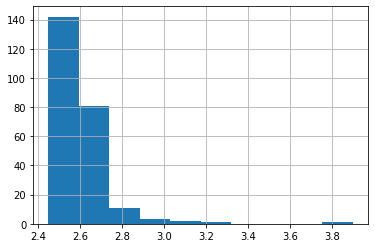

In [ ]:
# выведем на экран гистограмму по групиировке по населенным пунктам со значением медианы высоты потолков
data.groupby('locality_name')['ceiling_height'].median().hist(bins=10)

Если вывести гистограмму распределения медианы высоты потолков, то можно увидеть, что самое частое значение это 2.6 метра. Именно это значение является усредненным стандартом при типовой застройке по СНиПам, поэтому оптимальным будет заполнить пропуски именно этим значением, как типовым.
    
Но, чтобы все сделать в рамках одного цикла и без обработки ошибок, мы последовательно сделаем несколько действий:

1. Заполним все пропуски 0-ми, чтобы корректно рассчитать медиану
2. Затем заменим нули медианой, там где у нас имеются данные. Там же где у нас будут 0, медиана тоже будет 0
3. Все оставщиеся нули мы заполним типовым усредненным значением - 2.6 (2.5 - 2.7).

In [ ]:
for n in data['locality_name'].unique():
    data.loc[(data['locality_name'] == n) & (data['ceiling_height'].isna()), 'ceiling_height'] = 0 # заполняем пропуски 0-ми
    data.loc[(data['locality_name'] == n) & (data['ceiling_height'] == 0), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == n), 'ceiling_height'].median() # заполним медианой там где есть данные, где нет, останутся 0
    data.loc[(data['locality_name'] == n) & (data['ceiling_height'] == 0), 'ceiling_height'] = 2.6 # оставшиеся нули меняем на 2.6

In [ ]:
# проверим остались ли пропуски
data['ceiling_height'].isna().sum()

0

Мы видим, что пропусков не осталось, а значит с этим столбцом теперь можно работать

##### Проверим итоги заполнения пропусков

In [ ]:
# обнулим индексы, так как ранее до конца обработки мы это не делали осознанно
data = data.reset_index(drop=True)

In [ ]:
# Выведем итоговую информацию по датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Видим, что все пропуски, кроме осознанно оставленных, удалены. Осталось привести в порядок форматы данных.
В ходе заполнения дополнительно выявилось, что все данные с растояниями до центра города фактически не содержат значений после запятой, так что их тоже сделаем цельночисленными, не смотря на формально дробный формат.

#### Приведем в порядок форматы данных

In [ ]:
# приведем в порялдок форматы в тех столбцах, где этого еще не сделали
data = data.astype({'floors_total': 'int', 'locality_name': 'str', 'city_centers_nearest': 'int'})

In [ ]:
# снова выведем итоговую информацию для проверки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Теперь датафрейм готов к работе и можем приступать к необходимым вычислениями и исследованиям

### Добавьте в таблицу новые столбцы

#### Добавим столбец с ценой одного квадратного метра

In [ ]:
# вставим на 4 место столбец с ценой квадратноо метра
data.insert(3, 'price_m2',  (data['last_price'] / data['total_area']))
# округлим его значения
data['price_m2'] = data['price_m2'].round(2)

#### Добавим столбец с днем недели публикации объявления

In [ ]:
# вставим на 6 место столбец с днем недели публикации
data.insert(5, 'week_day', data['first_day_exposition'].dt.weekday)

#### Добавим столбец с месяцем публикации объявления

In [ ]:
# вставим на 7 место столбец с месяцем публикации
data.insert(6, 'month', data['first_day_exposition'].dt.month)

#### Добавим столбец с годом публикации объявления

In [ ]:
# вставим на 8 место столбец с годом публикации
data.insert(7, 'year', data['first_day_exposition'].dt.year)

#### Добавим столбец с типом этажа квартиры

In [ ]:
# создадим функцию для присваивания значения типа этажа
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [ ]:
# вставим на 14 место столбец с годом публикации
data.insert(13, 'type_floor', data.apply(type_floor, axis = 1))

#### Добавим столбец с расстоянием до центра города в километрах

In [ ]:
# вставим на 23 место столбец с рассточнием в километрах до центра Санкт-Петербурга
data.insert(22, 'city_centers_near_km', (data['city_centers_nearest'] * 0.001))
# округлим полученные значения и переведем в целочисленный формат
data['city_centers_near_km'] = data['city_centers_near_km'].round(0).astype('int')

Все необходимые дополнительные столбцы добавлены, переходим к следующему этапу

### Проведите исследовательский анализ данных

#### Изучить параметры объектов и построить отдельные гистограммы

Параметры для изучения:
    
1. общая площадь - total_area;
2. жилая площадь - living_area;
3. площадь кухни - kitchen_area;
4. цена объекта - last_price;
5. количество комнат - rooms;
6. высота потолков - ceiling_height;
7. тип этажа квартиры («первый», «последний», «другой») - type_floor;
8. общее количество этажей в доме - floors_total;
9. расстояние до центра города в метрах - city_centers_nearest;
10. расстояние до ближайшего парка - parks_nearest.

##### Гистограмма общей площади

In [ ]:
# выведем таблицу статистических показателей общей площади
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

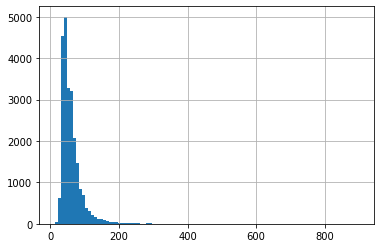

In [ ]:
# потсроим гистограмму распределения значений
data['total_area'].hist(bins = 100)

Вывод:

В целом распределение нормальное, видим, что есть выбросы в виде очень большой площади (900), но они единичные и на общую картину не влияют, тем более мы не значем, причну такого выброса: ошибка разрядности или действительно речь идет о какой-то большой усадьбе. В любом случае, так как выбросы единичные, даже их исправление на общую картину не повлияют.
Но из-за выбросов, визуально сложно понять какая общая площадь чаще всего встречается. Поэтому перестроим гистограмму с отсечением значений площади больше 100.

<AxesSubplot:>

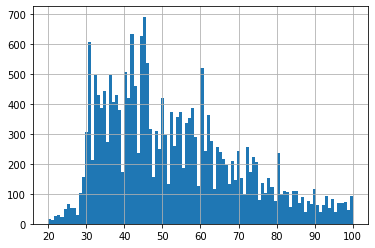

In [ ]:
# ограничим вывод гистограммы значениями от 20 до 100 кв.м
data['total_area'].hist(bins=100, range=(20, 100))

Вывод 2:

Теперь мы можем увидеть, что в Санкт-Петербурге и окрестностях чаще всего продаются квартиры с площадью 30 и 45 квадратных метров. Такая площадь, чаще всего у однокомнатных квартир. 60 кв. м это типичная площадь двухкомнатных квартир. При этом на графике мы видим, что в целом, после показателя 45 кв.м, чем больше площадь квартир, тем реже они продаются. Опять же, это типичная для рынка недвижимости зависимость, которая должна коррелировать, в том числе и с количеством комнат: маленькие и однокомнатные квартиры и строятся чаще и продаются чаще, немного реже продаются двухкомнатные квартиры. Чем больше количество комнат и площадь квартиры, тем она дороже и такие квартиры реже продаются.

##### Гистограмма жилой площади

In [ ]:
# выведем таблицу статистических показателей жилой площади
data['living_area'].describe()

count    23565.000000
mean        34.324899
std         21.722006
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

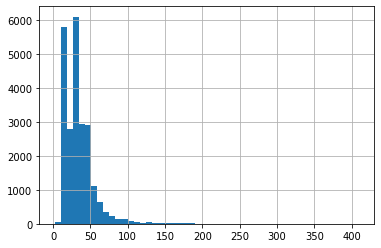

In [ ]:
# выведем гистограмму распределения значений жилой площади
data['living_area'].hist(bins=50)

Вывод:
    
В целом распределение нормальное, видим, что есть выбросы в виде очень большой площади (409), но они опять же единичные возможно связаны с выбросами общей площади и на общую картину не влияют. Однако, опять же стоит отсечь выбросы, чтобы посмотреть на самые популярные варианты.

<AxesSubplot:>

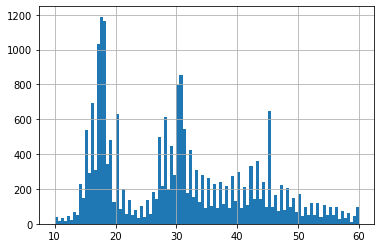

In [ ]:
# ограничим вывод гистограммы значениями жилой площади от 10 до 60 кв.м
data['living_area'].hist(bins=100, range=(10, 60))

Вывод 2:
    
В целом мы видим, что есть общая зависисмость, как с общей площадью - чем выше площадь, тем реже такие квартиры продаются, При этом мы видим три ярких пика: 17, 31 и 45 кв.м. Это соответствует типовым стандартам жилой площади для студии, однокомнатной квартиры и двухкомнатной квартиры. То есть квартиры с типовой застройкой ("хрущевки"), и студии продаются чаще всего.

##### Гистограмма площади кухни

In [ ]:
# выведем таблицу статистических показателей площади кухни
data['kitchen_area'].describe()

count    23565.000000
mean         9.565173
std          6.407798
min          0.000000
25%          6.300000
50%          9.000000
75%         11.410000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

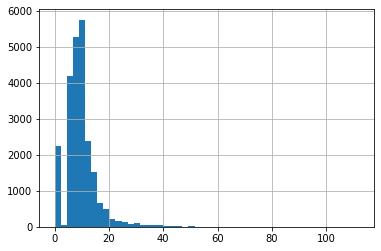

In [ ]:
# выведем гистограмму распределения значений площади кухни
data['kitchen_area'].hist(bins=50)

Вывод:
    
Так же, как и в предыдущих парамерах видим похожую зависимость - уменьшения количества объявлений с увеличением площади кухни, снова есть единичные выбросы, которые мешают детально изучить частотность и выявить причины пиков. Снова будем отсекать выбросы.

<AxesSubplot:>

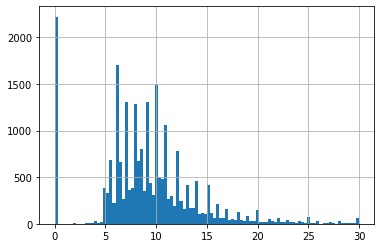

In [ ]:
# оганичим вывод гистограммы значениями площади кухни от 0 до 30 кв.м.
data['kitchen_area'].hist(bins=100, range=(0, 30))

<AxesSubplot:>

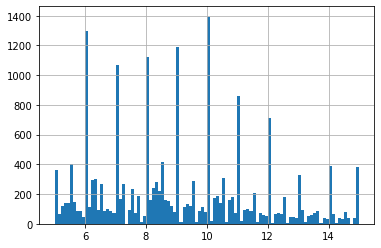

In [ ]:
# ограничим вывод гистограммы значениями площади кухни от 5 до 15 кв.м.
data['kitchen_area'].hist(bins=100, range=(5, 15))

Вывод 2:
    
Можно увидеть, что самым частотным пиком является 0 значение, но мы его выявили еще на этапе обработки и скорее всего это не аномалия, так как 0 значение площади кухни могут указывать либо в квартирах-студиях, либо в квартирах евростандарта, где кухонная зона совмещена с жилой. Так же видим пики на значениях 6, 7, 8, 9, 10, 11, 12, 13 и 14 кв. м.
Кухни 6 кв.м это стандарт для "хрущевки". Кухни 7, 8, 9, и 10 кв. м это стандарт для квартир сталинской застройки по проектам разных годов (с высотой потолков 3 м. и более) Кухни 11, 12, 13 и 14 кв.м это уже типовые размеры для типовых проектов панельных домов конца 70-х, начала 2000х годов. В более современных домах, типовая застройка отсутствует как факт, поэтому площади кухонь могут варьироваться от вариантов евростандарта, до каких-то промежуточных размеров.
Данный график, как раз и показывает, что чаще всего продаются квартиры именно типовой застройки от сталинских и хрущевских до поздних "панелек".

##### Гистограмма цены объекта

In [ ]:
# выведем таблицу статистических показателей последней цены объекта продажи
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Видим небольшую проблему - поскольку у нас большие цифры, с научной нотацией, нам необходимо ограничить вывод гистограммы.

<AxesSubplot:>

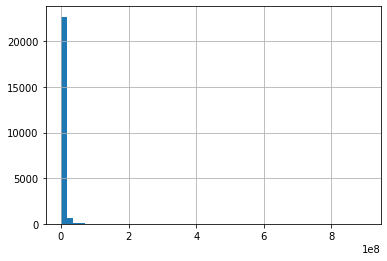

In [ ]:
# выведем гистограмму распределения цены объектов, сразу ограничив минимум и максимум по данным стат. таблицы
data['last_price'].hist(bins=50, range=(1.0e+04, 9.0e+08))

Из-за сильных единичных выбросов, не влияющих на общую картину, мы не можем посмотреть адекватную картину распределения цены, поэтому будем отсекать выбросы.

<AxesSubplot:>

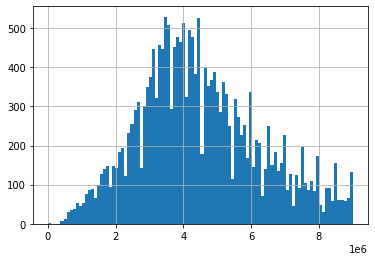

In [ ]:
# огранчим вывод гистограммы значениями о 10000 до 9 млн
data['last_price'].hist(bins=100, range=(1.0e+04,9.0e+06))

Вывод:
    
Можно увидеть, что чаще всего продаются квартиры в среднем в диапазоне от 3 до 4,5 млн. рублей. Далее по нормальному распределению уменьшение количества объявлений как с меньшей, так и с большей ценой, с разной степенью зависимости.

##### Гистограмма количества комнат

In [ ]:
# выведем таблицу статистических показателей количества комнат
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

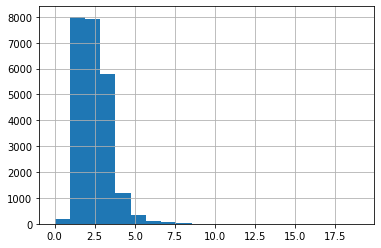

In [ ]:
# построим гистограмму распределения объявлений по количеству комнат
data['rooms'].hist(bins=20)

Снова видим выбросы, мешающие адекватно оценить картну распределения, будем отсекать выбросы

<AxesSubplot:>

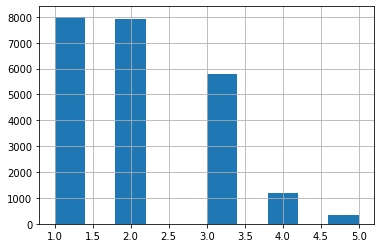

In [ ]:
# ограничим вывод гистограммы значениями от 1 до 5 комнат
data['rooms'].hist(bins=10, range=(1, 5))

Вывод:

А на этом графике мы увидели подтверждение ранее высказанной гипотезы, на основе анализа общей и жилой площади - чаще всего продаются именно однокомнатные и двухкомнатные квартиры - дальше уже соблюдается зависимость, чем больше количество комнат, тем реже такие квартиры продаются. Ну и в целом, количество комнат влияет на цену, из-за чего многокомнатные квартиры в принципе реже продаются.

##### Гистограмма высоты потолков

In [ ]:
# выведем таблицу статистических показателей высоты потолков
data['ceiling_height'].describe()

count    23565.000000
mean         2.656779
std          0.264462
min          1.000000
25%          2.540000
50%          2.560000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

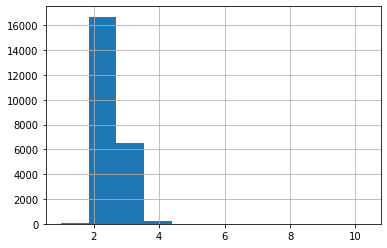

In [ ]:
# выведем гистограмму распределения высоты потолков
data['ceiling_height'].hist(bins=11)

Не смотря на серьезную предобработку данных в этом блоке, единичные выбросы снова мешают адекватно оценить картину распределения, будем отсекать.

<AxesSubplot:>

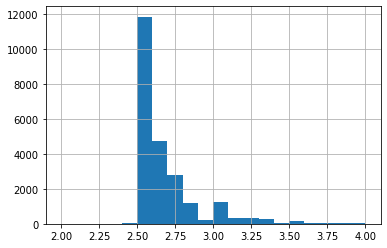

In [ ]:
# ограничим вывод гистограммы значенеми от 2 до 4 метров
data['ceiling_height'].hist(bins=20, range=(2, 4))

Вывод:
    
Не смотря на то, что довольно серьезное количество пропуском мы заменили значнием 2.6, как усредненным для типовой застройки, чаще всего продаются квартиры с высотой потолков 2.5, 2.6, 2.7. Это как раз стандарты высоты потолков для пятиэтажных "хрущевок" и девятиэтажных "панелек". Квартиры сталинской застройки с высотой потолков от 3 метров все-таки продаются реже. И квартиры с совсем уж нетипичной высотой потолков от мансардных, до двухуровневых со вторым светом встречаются в единичных случаях.  

##### Гистограмма типа этажа квартиры

In [ ]:
# выведем таблицу статистических показателей типа этажа квартиры
data['type_floor'].describe()

count      23565
unique         3
top       другой
freq       17326
Name: type_floor, dtype: object

<AxesSubplot:>

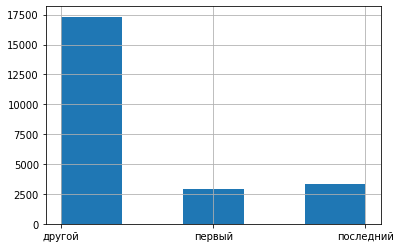

In [ ]:
# выведем гистограмму распределения объявлений по типу этажа
data['type_floor'].hist(bins=5)

Вывод:

ИМХО. По факту эта гистограмма ничего нам не говорит, так как "другой" этаж это и второй и третий и любой другой. В общем то понятно, что квартиры на первом и последнем этажах продаются гораздо реже чем любые дугие - это как в кубиках: грани 1 и 6 определенно выпадают реже чем любая другая грань, потому что "других" граней будет четыре, а не одна. Но и строить гистограмму по номеру этажа тоже не совсем правильно, так как с учетом 5-этажных хрущевок, количество продаж на этажах со 2 по 4 будет явно больше чем с 6 по 9 и тем более выше. Мое личное мнение - гистограмма абсолютно неинформативная, так как показывает совершенно очевидную зависимость.
    
Интересным здесь может быть только тот факт, что последние этажи продаются несколько чаще, чем первые. Но и тут есть объяснение - квартиры на первых этажах часто переоборудуются под нежилую недвижимость: офисы, магазины и т.п. Именно поэтому в последние годы современная застройка полностью игнорирует первые этажи как факт, изначально их выделяя под коммерческую недвижимость.

##### Гистограмма общего количества этажей в доме

In [ ]:
# выведем таблицу статистических показателей этажности домов
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

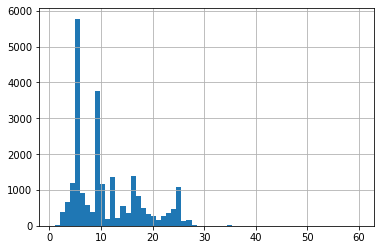

In [ ]:
# построим гистограмму распределения этажности с ограничением вывода от 1 до 60
data['floors_total'].hist(bins=60, range=(1, 60))

Вывод:

Ну в общем вполне очевидно, что выброс в виде 60-этажного дома это ошибка, причем человеческая, так как 60 этажных домов в Санкт-Петербурге нет, причина не совсем понятна, потому что и 6 этажные дома это скорее экзотика, чем стандарт. Но, даже не отсекая выбросы, сразу становится заметно, что самые популярные в продаже квартиры, это квартиры в 5-этажных "хрущевках" и 9-этажных "панельках", о чем свидетельствовали и предыдущие гистограммы по типам общей, жилой и кухонной площадям, а также высоте потолков. Все остальные варианты этажности, хоть и существуют, но все же, в последние годы, скорее экзотика, чем общее правило. А 25-этажные "свечки" и "человейники" стали определенным стандартом новостроек последних 10 лет.

##### Гистограмма расстояния до центра города в метрах

In [ ]:
# выведем таблицу статистических показателей расстояния до центра СПб
data['city_centers_nearest'].describe()

count     23565.000000
mean      23354.174920
std       29595.302305
min         181.000000
25%       10935.000000
50%       14306.000000
75%       21503.000000
max      308157.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

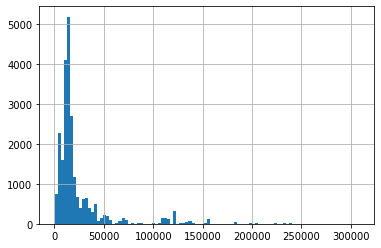

In [ ]:
# построим гистограмму распределения удаленности от центра СПб
data['city_centers_nearest'].hist(bins=100)

Видно, что выбросы в виде расстояния далеких населенных пунктов Ленинградской области это выбросы, хоть и естественные, так как отсутствующие значения мы вручную заполнили геоданными. Но они мешают нам оценить популярное распределение, так что будем все-таки отсекать.

<AxesSubplot:>

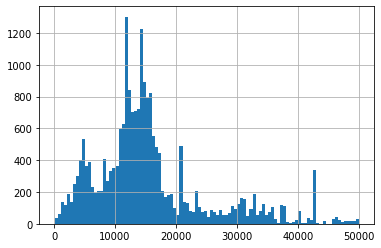

In [ ]:
# ограничим вывод гистогшраммы значениями от 100 метров до 50 км
data['city_centers_nearest'].hist(bins=100, range=(100, 50000))

Вывод:

Не смотрая на то, что все еще картинка получается довольно нечеткой, становится понятно, что:
    
1. Основная масса объявления приходится на Санкт-Петербург, то есть в пределах условного 18-километрового радиуса основного города (без учета пригорода). Далее прямая зависимость по уменьшению количества объявлений по удаленности от города. Однако мы видим что есть пики в районе 20 и 43-44 километров. Скорее всего речь о Гатчине (42 км от центра) и о Всеволожске (22 км от центра) - самых крупных населенных пунктах в ближайшей округе Санкт-Петербурга.
2. В центре Санкт-Петербурга и ближайшей территории квартиры продаются не так часто. Самая высокая частота объявлений с пиками как раз в районе 12 и 15 км от центра. То есть, чаще всего квартиры продаются в условной окраине Санкт-Петербурга, в спальных районах.

##### Гистограмма расстояния до ближайшего парка

In [ ]:
# выведем таблицу статистических показателей расстояни до ближайшего парка
data['parks_nearest'].describe()

count    23565.000000
mean       167.169998
std        306.301628
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

Вспоминаем, что 0 значениями мы заполнили пропуски именно для того, чтобы их в дальнейшем отсечь при анализе, поэтому сразу обрезаем от гистограммы 0 значения.

<AxesSubplot:>

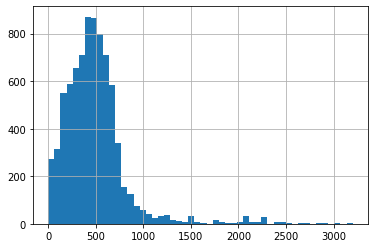

In [ ]:
# построим гистограмму распределения расстояния до ближайшего парка
data['parks_nearest'].hist(bins=50, range=(1, 3200))

<div class='alert alert-info'>
Видим, что у нас большое количеств выбросов, мешающих качественному анализу частостности, чистим от выбросов.

<AxesSubplot:>

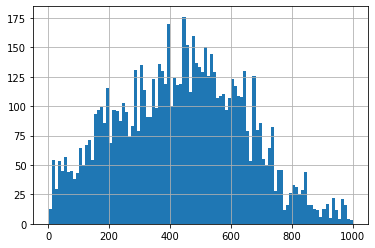

In [ ]:
# ограничим вывод гистограммы значениями расстояни до парка от 1 м до 1 км
data['parks_nearest'].hist(bins=100, range=(1, 1000))

Вывод:
    
В околопарковой зоне на самом деле квартиры не так уж и часто продаются (возможно из-за дороговизны). Большая часть квартир продается в зоне 390-450 метров от ближайшего парка. В остальном распределение является статистически нормальным - уменьшается количество объявлений как по мере удаления от ближайшего парка, так и по мере приближения к зоне 400 метров. При этом в ближайшей зоне квартиры продаются все-таки чаще чем в удаленной - плотность частоты выше.

#### Изучить, как быстро продавались квартиры (столбец days_exposition)

In [ ]:
# выведем таблицу статистических показателей количества дней публикации объявлений
data['days_exposition'].describe()

count    23565.000000
mean       156.420115
std        213.517293
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

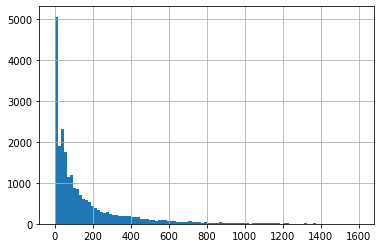

In [ ]:
# выведем гистограмму распределения количества дней публикации
data['days_exposition'].hist(bins=100, range=(0, 1600))

<AxesSubplot:>

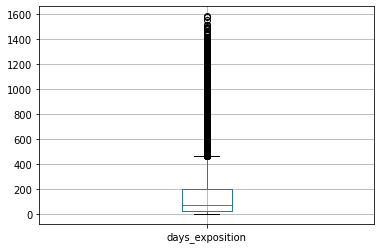

In [ ]:
# выведем диаграмму распределения
data.boxplot('days_exposition')

Видим, что разбег в сроках активности объявлений большой: от 0 до 1580 дней (почти 4,5 года) с сильными выбросами, из-за этого сильное смещение вниз диаграммы распределения. Мы помним что 0 это может быть как снятие объявления в тот же день, так продолжающаяся, не закрытая публикация). Но в целом средний срок публикации около 5 месяцев, что выглядит нормальным показателем.

<AxesSubplot:>

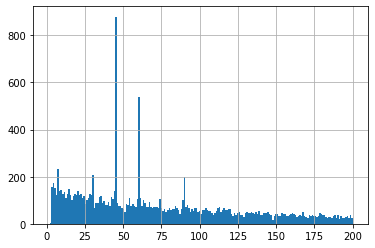

In [ ]:
# ограничим вывод гистограммы значениями от 1 до 200 дней
data['days_exposition'].hist(bins=200, range=(1, 200))

Вот тут мы уже видим, что чаще всего объявления закрываются за 45 или за 60 дней, то есть самые часты сроки размещения объявлений 1,5 и 2 месяца. Больше похоже на какую-то систему автоматического снятия объявлений. Но в целом по плотности можнос казать, что подавляющее большинство квартира продается в течение первых 50 дней, дальше чем выше срок размещения, тем количество объявлений. Посмотрим более детально срез до 45 дней.

<AxesSubplot:>

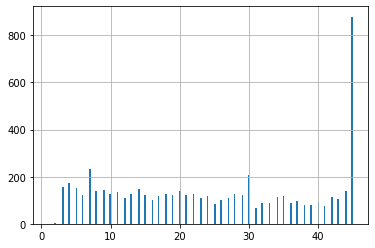

In [ ]:
# ограничим вывод гистограммы значениями от 1 до 45 дней
data['days_exposition'].hist(bins=200, range=(1, 45))

Снова очень подозрителен пик на 45 день, подозреваю, что действительно речь о работе какой-то автоматики. Но гораздо примечательне пики на 5 и 30 день - они не такие выдающиеся, но тем не менее выпадают из общего тренда. Подозреваю, что тут речь о стандартной схеме применяемой риэлторами. Во многих сервисах, чем дольше объявление находится в публикации, тем ниже его поисковая выдача, кроме оплаченных услуг по продвижению. Исходя из этого, риэлторы часто убирают объявленгие с публикации и заново его публикуют, чтобы поднять в поисковой выдаче. Видимо именно с этим связан пик на 5 день публикации. А вот 30 день скорее всего и есть тот самый пик в течение кототрого действительно снимают объявление с размещения, вот только снимают его скорее всего из-за того, что риэлторы заключают договор на 1 месяц, в течение котрого показывают максимальную активность. С долгосрочными договорами не каждый риэлтор готов работать.

**ИМХО**. В такой постановке сбора статистики, на объективность выводов могут оказать слишком много факторов, которые необходимо убирать, иначе однозначно говорить, что квартиры продаются в первые 45 дней будет не совсем правильно, хотя, если ориентироваться не на пики, то скорее всего зависимость соблюдается - большая часть недвижимости продается в первые 50 дней. Исходя из того, что основная плотность у нас находится в сроках до 30 дней  и первый квартиль находится на отметке 22 дня, именно продажи до 22 дней я бы считал быстрыми. А вот продаже свыше 73 дней - где находится очередной пик и медиана, я бы относил к долгим продажам. Ну и все что выше 198 дней - выше третьего квартиля - считать чрезвычайно долгими продажами, что  и видно из первого графика.

#### Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта

Необходимо изучить зависимости цены (last_price) от:
    
1. общей площади (total_area)
2. жилой площади (living_area)
3. площади кухни (kitchen_area)
4. количества комнат (rooms)
5. типа этажа, на котором расположена квартира (первый, последний, другой) (type_floor)
6. даты размещения (день недели, месяц, год) (week_day, month, year)

##### Изучение зависимости цены от общей площади

Поскольку необходимо изучть зависимость двух параметров, достаточно построть диаграмму рассеяния и вычислить коэффициент корреляции Пирсона

0.65

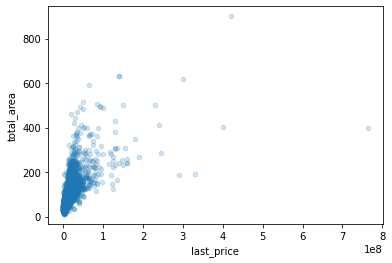

In [ ]:
# построим диаграмму рассеяния
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
# выведем коэффициент корреляции
data['last_price'].corr(data['total_area']).round(2)

Ничего не понятно, нужно снова вводить ограничение вывода

0.65

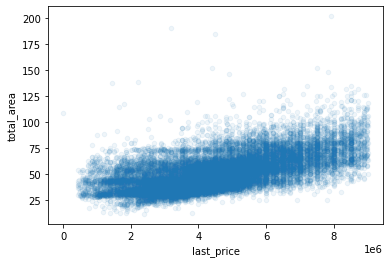

In [ ]:
# ограничим вывод диаграммы рассеяния выводом значений от 10000 до 9 млн
data.query('1.0e+04 < last_price < 9.0e+06').plot(x='last_price', y='total_area', kind='scatter', alpha=0.07)
# выведем коэффициент корреляции
data['last_price'].corr(data['total_area']).round(2)

**Вывод**:
    
Вот теперь становится видно, что зависимость определенно есть - зависимость прямая и коэффициент корреляции Пирсона достаточно высокий - 0,65. Поэтому можно смело говорить что цена квартиры напрямую зависит от ее общей площади. Казалось бы, это очевидный факт, но мы нашли ему статистическое подтверждение, с определением математического коэффициента зависимости.

##### Изучение зависимости цены от жилой площади

0.56

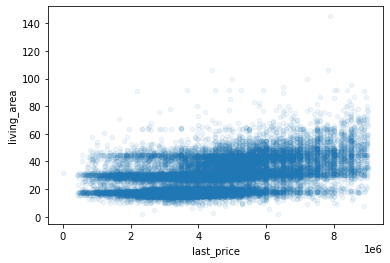

In [ ]:
# постоим диаграмму рассения сразу с ограниченим вывод диапазона цены
data.query('1.0e+04 < last_price < 9.0e+06').plot(x='last_price', y='living_area', kind='scatter', alpha=0.07)
# выведем коэффициент корреляции
data['last_price'].corr(data['living_area']).round(2)

**Вывод**:
    
Снова видим, что есть прямая зависимость цены квартиры от жилой площади, но корреляция более слабая - 0,56

##### Изучение зависимости цены от площади кухни

0.39

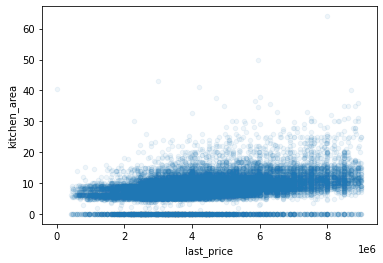

In [ ]:
data.query('1.000000e+04 < last_price < 9.00000e+06').plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.07)
data['last_price'].corr(data['kitchen_area']).round(2)

**Вывод**:
    
Здесь снова видим прямую зависимость, но корреляции еще ниже - 0,39. Но в общем то это, по своему, тоже очевидный факт - размер кухни никогда и не определял цену, тут скорее обратное - чем больше общая площадь квартиры, тем больше размер кухни, хотя, например в хрущевских стандартах и в двухкомнатных кварирах размер кухним мог быть как в однокомнатных.

##### Изучение зависимости цены от количества комнат

0.36

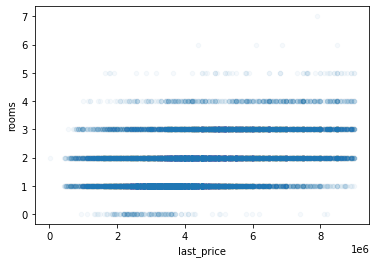

In [ ]:
# постоим диаграмму рассения снова с ограниченим вывод диапазона цены
data.query('1.000000e+04 < last_price < 9.00000e+06').plot(x='last_price', y='rooms', kind='scatter', alpha=0.04)
# выведем коэффициент корреляции
data['last_price'].corr(data['rooms']).round(2)

**Вывод**:
    
Здесь снова видим прямую зависимость, но с низкой корреляцией - 0,36. И вот тут мы видим интересное наблюдение - считается, что количество комнат влияет на цену квартиры, однако зависимость не линейная и с увеличением количества комнат уменьшается цена за квадратный метр. И вот тут мы как раз и видим те самые случаи, что однокомнатные квартиры могут стоит примерно на том же уровне что и трехкомнатные. Но на это могут влиять и другие факторы: удаленность от центра, цена за квадратный метр и т.п. Понятно дело, что врад ли однокомнатная квартира площадью 20 кв.м в каком-нибудь Сосновом Бору будет стоить так же как и однокомнатная квартира в центре Санкт-Петербурга - это и определяет такой низкий коэффциент корреляции, его правильнее считать на группировках по отдельным населенным пунктам.

##### Изучение зависимости цены от типа этажа расположения квартиры

<AxesSubplot:xlabel='last_price', ylabel='type_floor'>

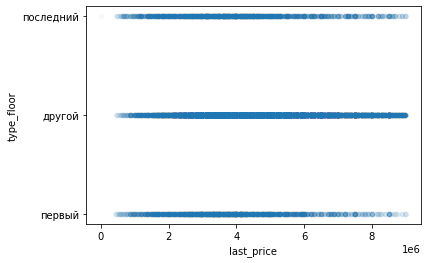

In [ ]:
# постоим диаграмму рассения снвоа с ограниченим вывод диапазона цены
data.query('1.000000e+04 < last_price < 9.00000e+06').plot(x='last_price', y='type_floor', kind='scatter', alpha=0.04)
# на этот раз без коэффициента, так как второй показатель у нас строчный

Опять ничего не понятно, такой вариант диаграммы рассеивания нам определенно не подходит, да и коэффициент корреляции мы тут посчитать не сможем. Кажется что стоит посмотреть зависимость медианной цены (из-за больших выбросов). Соберем для этого сводную таблицу, на базе котрой по гистограме посмотрим зависимость

<AxesSubplot:ylabel='type_floor'>

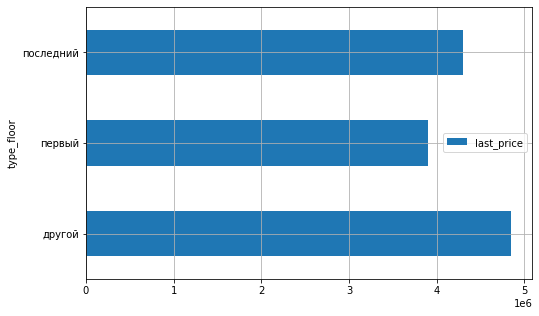

In [ ]:
(data
     .pivot_table(index = 'type_floor' , values = 'last_price', aggfunc='median') # собираем сводную таблицу со значением медиан
     .plot(y='last_price', kind='barh', figsize=(8, 5), grid=True)) # выводим гистограмму с распределеним данных по таблице

**Вывод**:

С точки зрения оценки влияния типа этажа на медианную цену, мы видим, что самая низкая цена установлена на первые этажи, это подтверждает устоявшееся мнение, что квартиры на первых этажах самые дешевые (холодные полы, шум со двора, высокие риски проникнования через окно и прочее). На втором месте по цене последние этажи (высокий риск протечки с кровли в случае осадков и таяния снега, проблемы с давлением воды в системе водоснабжения и прочее). Ну и квартиры на остальных этажах всегда дороже.
В итоге, мы видим прямую зависимость цены квартиры от типа этажа, а заодно статистически подтвердили устоявшееся мнение о том насколько первый, последний или промежуточный этажи влияют на стоимость.

##### Изучение зависимости цены от даты размещения объявления (день недели, месяц, год)

###### Изучение зависимости цены от дня недели

<AxesSubplot:xlabel='week_day'>

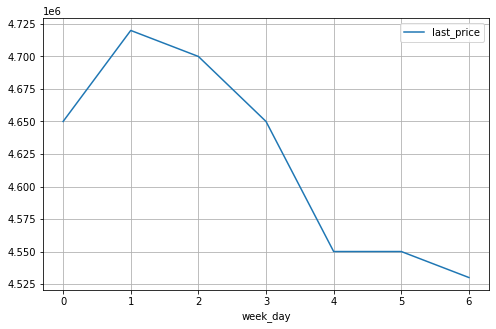

In [ ]:
(data
     .pivot_table(index = 'week_day' , values = 'last_price', aggfunc='median') # снова делаем группировку по медианам
     .plot(y='last_price', figsize=(8, 5), grid=True)) # выводим результат в виде линейной диаграммы

**Вывод**:
    
Видим, что медианное значение цены публикаци во вторник самая высокая, затем идет среда, после этого понеделтник и четверг, и самая низкая цена у объявлений опубликованных в конце недели: пятница, суббота и сама низкая цена у объявлений в воскресенье.
Чем объяснить такую зависимость, даже не представляю, но закономерность любопытная, возможно дьявол кроется в каких-то других деталях.

###### Изучение зависимости цены от месяца публикации

<AxesSubplot:xlabel='month'>

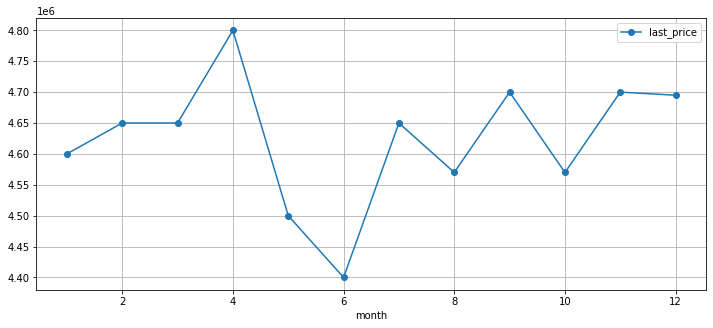

In [ ]:
(data
     .pivot_table(index = 'month' , values = 'last_price', aggfunc='median') # снова делаем группировку по медианам
     .plot(y='last_price', style='o-', figsize=(12, 5), grid=True)) # выводим результат в виде линейной диаграммы

**Вывод**:
    
Видим, что в июне финальная цена размещения самая низкая. Видимо это связано с периодом отпусков, дачным сезоном и каникулами: люди стараются поскорее продать квартиры и больше времения проводить за городом. Причем тренд на снижение четко прослеживается с апреля по июнь. В вот с июля по осень цены растут, хоть и скачкообразно. В январе цены проседают, по сравнению с декабрем, январь самый финансово слабый у многих месяц из-за сильных трат на Новый Год, поэтому снижают цены, стараясь поскорее продать квартиры. При этом с января по апрель цены снова растут, это период когда мноние дома, финансовая ситуация стабилизируется и нет острой нужны в свободных средствах.
Весьма любопытное наблюдение, которое можно использовать, с учетом срока продаж квартир, чтобы при продаже своей недвижимости, подороже ее продать и наоборот, подешевле купить новую,  но для более точного прогноза я быделал такие срезы по каждому году отдельно, так как в разные годы, финсовая стабильность людей по месяцам может меняться (изменение ключевой ставки, период пандемии и т.п.).

###### Изучение зависимости цены от года публикации

<AxesSubplot:xlabel='year'>

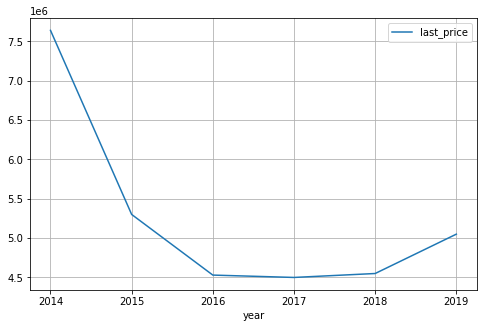

In [ ]:
(data
     .pivot_table(index = 'year' , values = 'last_price', aggfunc='median') # снова делаем группировку по медианам
     .plot(y='last_price', figsize=(8, 5), grid=True)) # выводим результат в виде линейной диаграммы

**Вывод**:
    
Видно, что с 14 по 16 год было резкое падение цен на недвижимость, хотя было бы хорошо посмотреть на эту статистику еще в разреце цены на квадратный метр. Кидимо это как раз связано с событиями 14 года, когда из-за определенных политических событий произошло сильное снижение платежеспособности населения + резко возросла ключевая ставка ЦБ РФ с 5,5 до 17, что значительно снизило спрос на недвижимость, а вот потом уже стабилизировалась ситуация  и с платежеспособностью,  и с ключевой ставкой, что отлично и на графике цен - цены тоже стабилизировались и с 2018 снова начали расти. Жалко что нет данных позднее 19 года, так как в 22 году снова было резкое повышение ключевой ставки и было бы интересно посмотреть на график цен на недвижимость.

#### Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для этой задачи, нам необходимо построить сводную таблицу со следующим параметрами:

1. Выбрать 10 населённых пунктов с наибольшим числом объявлений
2. Посчитать среднюю стоимость квадратного метра в этих населенных пунктах
3. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра
    
Для этих целей создадим отдельную переменную куда поместим сводную таблицу по нужным нам параметрам

In [ ]:
# записываем в переменную данные сводной таблицы по названию населенных пунктов со значниеми количества и среднего значения
top_ten_pivot = data.pivot_table(index = 'locality_name', values = 'price_m2', aggfunc=['count', 'mean'])
# назначаем названия столбцов таблице
top_ten_pivot.columns = ['count', 'mean']
# сортируем по количеству и переписывем только топ 10
top_ten_pivot = top_ten_pivot.sort_values(by='count', ascending=False).head(10)
# выведем на экран результат
top_ten_pivot

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877339
Мурино,586,86041.116024
Кудрово,470,95260.846128
Шушары,439,78551.344647
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
Парголово,327,90175.913089
Гатчина,307,68746.146515


Таблица готова, осталось выделить населенные пункты с самой высокой и самой низкой средней ценой за квадратный метр.

In [ ]:
# выведем на экран максимальное значение среднего
display(top_ten_pivot[top_ten_pivot['mean'] == top_ten_pivot['mean'].max()])
# выведем на экран минимальное значение среднего
top_ten_pivot[top_ten_pivot['mean'] == top_ten_pivot['mean'].min()]

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877339


,count,mean
locality_name,,
Выборг,237,58141.909325


В общем то, вполне понятно, что самая высокая стоимость квадратного метра в Санкт-Петербурге, а вот самая низкая стоимость квардртаного метра из топ 10 самых популярных населенных пунктов в Выборге.

#### Провести анализ изменения  средней цены квартир в Санкт-Петербурге на разном удалении от центра.

Для анализа необходимо построить график изменения средней цены для каждого километра от центра Петербурга

<AxesSubplot:xlabel='city_centers_near_km'>

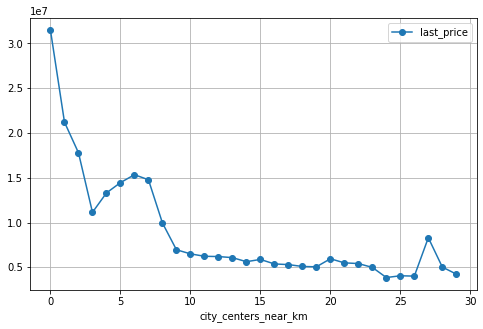

In [ ]:
(data
     .query('locality_name == "Санкт-Петербург"') # сделаем срез по СПб
     .pivot_table(index = 'city_centers_near_km', values = 'last_price', aggfunc = 'mean') # собрем сводную таблицу с растоянием до центра в км
     .plot(y='last_price', figsize=(8, 5), style='o-', grid=True) # построим линейную диаграмму
)

Как мы видим, в радиусе 2-х километров от центральной точки Санкт-Петербурга (Дворцовая площадь) недвижимость самая дорогая, но по мере удаления, средняя цена объектов недвижимости снижается. Пиковое снижение находится на отметке в 3 километра (как раз в этом радиусе находятся два кладбища на Васильевском острове и несколько вокзалов), затем снова повышается до отметки в 6 км и снова резко снижается до отметки в 9 километров. Очевидно что именно эти 9 километров можно назвать условным центром Сакнт-Петербурга. Далее стоимость квартир планомерно снижается каждый километр. Небольшой пик есть в районе 15 км и 20 км. Большой пик удорожания виден в районе 27 км от точки центра - здесь находится город Пушкин, где находится Царское село, но формально он все еще находится в большом радиусе Санкт-Петербурга. Хотя в нашей базе есть и объявления, в которых Пушкин прямо указывается, но все же это считается Пушкинским районом Санкт-Петербурга.

### Напишите общий вывод

<b>Общий вывод</b>
    
Для исследовательской работы нам были предоставлены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Все данные, кроме данных геосервисов формировались пользователями вручную.
    
В качестве исследовательской задачи была поставлена: научиться определять рыночную стоимость объектов недвижимости и установить параметры, влияющие на цену объектов.

Конечная цель: построить автоматизированную систему для отслеживания аномалии и мошеннической деятельности. Однако, нам не были предоставлены описания типичных мошеннических схем и свойственных им аномалий, чтобы научиться их определять. Из личной практики, на указанных данных мы можем определять лишь мошеннические аномалии связанные с некорректно низкой ценой, а для этого нужно задавать шаблон на основе диаграммы размаха по распределению цены квадратного метра в каждом населенном пункте и, например, все что ниже первого квартиля считать условной аномалией и разбираться по дополнительным признакам имеют ли место мошеннические действия. К сожалению, в данной работе такая задача нам не ставилась - рекомендую добавить.
    
**Пример задачи: составить диаграммы размаха (хотя бы по топ 10), и вывести в отдельную таблицу все значения ниже первого квартиля.**

Однако, для качественного определения признаков мошеннических действий, не хватает информации о:
    
1. Типе продаваемой квартиры: новостройка или вторичная продажа
2. Включении задатка при продаже квартиры
3. Собственниках квартиры (единственный, долевая, есть ли несовершеннолетние собственнки). Однако для этого необходимо решить вопрос с интеграцией с данными Росреестра.
4. Наличии долгов по ЖКХ. Муторно, но в теории возможно интегрироваться с управляющими компаниями, хотя у них и нет единой системы учета коммунальных платежей, либо как-то получать данные о коммунальных долгах через Госуслуги.
5. Проверка статуса собственников (жив/мертв), на основании данных из Росреестра можно получать из данных Федеральной нотариальной палаты, или косвенно из ФНС.

<h4>Предобработка данных</h4>
    
В ходе предобработки данных были выявлены следующие аномалии, которые можно отнести к человеческому фактору:
    
 - наличие пропусков и некорректное указание высоты потолков
 - наличие пропусков в данных о жилой площади
 - наличие пропусков в количестве этажей в доме
 - наличие пропусков в данных о том, аппартаменты это или нет
 - наличие пропусков в данных о площади кухни
 - наличие пропусков в данных о количестве балконов
 - наличие пропусков в названии населенного пункта
 - отсутствие единообразия в заполнении даных о населенном пункте
    
Однако, мы имеем в том числе большое количество и явно технических пропусков, из-за чего не все пропуски из-за человеческого фактора могут быть таковыми.
    
В ходе предобработки данных были выявлены следующие аномалии:
    
 - не соответствующие общей стилистике завания колонок
 - наличие пропусков в данных о расстоянии до ближайшего аэропорта
 - наличие пропусков в данных о расстоянии до центра города
 - наличие пропусков в данных о числе парков в радиусе 3 км
 - наличие пропусков в данных о расстоянии до ближайшего парка
 - наличие пропусков в данных о числе водоёмов в радиусе 3 км
 - наличие пропусков в данных о расстояние до ближайшего пруда
 - наличие пропусков в данных о числе дней размещения объявления

Для исправления выявленных аномалий были приняты следующие меры:
    
 - названия столбцов приведены к единому "змеиному" стилю
 - пропуски в данных о числе дней размещения объявления заменены на 0-вые
 - строки с пропусками данных о числе этажей в доме удалены, так как их количество незначительное и не влияет на анализ
 - пропуски в данных о количестве балконов зполнены 0-ми
 - строки с пропусками данных о названии населенного пункта удалены, так как их количество незначительное и не влияет на анализ. Сами названия приведены к единой форме с удалением неявных дубликатов
 - пропуски в данных о том, аппартаменты это или нет, заменены на False
 - пропуски в данных о количестве парков в радиусе 3 км заменены 0-ми
 - пропуски в данных о количестве прудов в радиусе 3 км заменены 0-ми
 - пропуски в данных о жилой площади заполнены медианными данными
 - пропуски в данных о площади кухни заменены 0-ми
 - пропуски в данных о расстоянии до ближайшего парка заменены на 0-вые
 - пропуски в данных о расстоянии до ближайшего пруда заменены на 0-вые
 - пропуски в данных о расстоянии до ближайшего аэропорта заменены на 0-вые
 - пропуски в данных о расстоянии до центра Санкт-Петербурга заполнены на основании медианных значений и на основании вручную собранных геоданных
 - аномалии в данных о высоте потолков испралены, пропуски заполнены медианными значениями и средним по строительныи нормам - 2.6

Также форматы данных приведены к более подходящим и удобным для работы форматам.

Для дальнейшего анализа данных в датафрейм добавлены столбцы с дополнительными данными:
    
 - данные о цене квадратного метра
 - данные о дне недели публикации объявления
 - данные о месяце публикации объявления
 - данные о годе публикации объявления
 - данные о типе этажа (первый, последний, другой)
 - данные о расстоянии до центра города в километрах

<h4> Задачи проекта и результаты </h4>
В качестве основной задачи необходимо определить рыночную стоимость объектов недвижимости и установить параметры, влияющие на цену объектов.

В ходе исследования установлено:
 - чаще всего продаются квартиры с типовыми размерами общей площади 30, 45 и 60 кв. метров и судя по квадратуре чаще всего продаются квартиры с типовым метражом для однокомнатных и двухкомнатных квартир
 - чаще всего продаются квартиры с жилой площадью 17, 31 и 45 кв. метров. Это соответствует нормам жилой площади для студий, однокомнатных и двухкомнатных квартир
 - чаще всего продаются квартиры с площадбю кухни 0 (студии или евро), 6, 7, 8, 9, 10, 11, что соответствует типовым стандартам завтройки разных годов, для квартир с разным количеством комнат.
 - чаще всего продаются квартиры в среднем в диапазоне от 3 до 4,5 млн. рублей
 - чаще всего продаются однокомнатные и двухкомнатные квартиры, что подтверждает ранее сделанные выводны на основании общей, жилой площади квартир и площади кухни в квартирах
 - чаще всего продаются квартиры с высотой потолков 2.5, 2.6, 2.7 м. Это стандарты высоты потолков для пятиэтажных "хрущевок" и девятиэтажных "панелек", то есть квартир типовой застройки.
 - квартиры на последних этажах продаются чаще, чем на первых
 - чаще всего продаются квартиры в 5-этажных "хрущевках" и 9-этажных "панельках"
 - основная масса объявлений приходится на Санкт-Петербург, Гатчину и Всеволожск. В самом Санкт-Петербурге, квартиры чаще всего продаются за пределами центра города, ближе к окраине, в спальных районах.
 - относительно расстояний до ближайшего парка, чаще всего квартиры продаются в зоне 390-450 метров до ближайшего парка в околопарково зоне квартиры продаются существенно реже.
 - в основном квартиры продаются в срок от 22 дней до 6 месяцев. Средний срок продажи квартир - 5 месяцев. Но подавляющее большинство объявлений закрывается в срок до 50 дней. При этом чаще всего объявления закрываются на 45 и 60 день. Также установлено что есть пики снятия публикаций на 5 и 30 день. В итоге все продажи до 22 дней можнго отнести к быстрым, продажи свыше 73 дней долгими, а свыше 198 дней чрезвычайно долгими.

Кроме того установлено, что:
    
 - общая площадь сильнее всего влияетна цену объекта
 - жилая площадь меньше влияет на цену объекта и зависимость скорее является косвенной и производной от общей площади
 - площадь кухни слабо виляет на цену объекта и это показатель опять же скорее косвенный и производный от общей площади
 - количество комнат напрямую слабо влияет на цену объекта, опять же гораздо важнее общая площадь, которую эти комнаты образуют и географическое расположение квартиры
 - квартиры на первом этаже  самые дешевые, на последнем этаже немного дороже и квартиры на любом другом этажи дороже чем на первом или последнем.
 - самая высокая цена у объявлений размещенных во вторник, самая низкая у объявлений размещенных в воскресенье
 - с точки зрения сезонности дороже всего квартиры продаются в апреле, дешевле всего в июне в начале сезона отпусков. но к зиме, цены начинают повышаться
 - в исследуемых годах, самая высокая цена на недвижимость была в 2014 году, затем резко снижалась и начала расто только св 2018-2019 годах.
 - из 10 самых популярных по количеству объявлений населенных пунктов дороже всего кварриры в Санкт-Петербурге, дешевле всего в Выборге
 - В самом Санкт-Петербурге, по мере удаления от центра, стоимость квартир планомерно снижается (за исключением привокзальных районов и около кладбищ). Также, по сравнению с такой же удаленностью, довольно дорогими можно считать квартиры в Царском Селе (Пушкин).


<h4>Рекомендации</h4>
По результатам проведенной работы можно дать следующие рекомендации:

1. Из-за большо количества технических ошибок необходимо сделать повторную выгрузку данных и провести повторную исследовательскую работу на более качественных реальных данных.
2. Получить пояснения от команды проекта о том, в каких случаях пропуски данных являются естественными и по какой причине.
3. Протестировать внедрение интеграции с данными сайта https://dom.mingkh.ru/. При заполнении адреса объекта недвижимости это позволит выставить значения по умолчанию о количестве этажей, внедрить категорию "тип застройки" для определения тиовых и индивидуальных проектов. При застройке типового объекта можно сразу выставлять параметры по умолчанию, если пользователь их не вводит, взяв параметры типовых зсатроек, например с сайта https://www.kvmeter.ru/.
4. При указани данных о населенном пункте и адресе объекта недвижимости, внедрить справочник населенных пунктов, и сделать заполение по подсказке в соответствии с КЛАДР или ФИАС, чтобы данные данные были единообразные и стандартизированные.
5. В таких параметрах как "Студия", "Апартаменты" и "Свободная планировка" по умолчанию выставлять параметр "False", в случае, если отсутствует "галочка" в нужном блоке.
6. При указании параметра "Количество балконов" по умолчанию выставлять параметр "0", если данные не указываются.
7. При определении количества парков и прудов в радиусе 3 км, предусмотреть значение "0", при их отсуствии, чтобы избежать пропуска данных.
8. В данных о количестве дней размешения:

- проверить сработку автоматики на пиковых днях: 30, 45, 60 и т.п. В случае, если закрытие объявлений действительно происходит автоматически, ввести дополнительную информацию в данные: ручное или автоматическое закрытие объявлений.
- для контроля повторных поубликаций, с целью повышения рейтинга, ввести id объявлений и объектов недвижимости, это позволит считать реальное количество дней размещения объявления до продажи, а также отслеживать повторное выставление на продажу объекта недвижимости.
9. Для более точно определения признаков мошеннических действий, дополнительно предусмотреть в анкете объекта недвижимости указанные выше параметры:
 - типе продажи: новостройка или вторичная продажа
 - включен ли задаток при продаже квартиры
 - собственность единоличная или долевая
10. Отдельно протестировать возможность интеграции данных с Росреестром, Госуслугами, Федеральной нотариальной палатой, ФНС.
    
**Дополнительно:**
Включить в текущую учебную программу задачу на выявление объявлений ниже первого квартиля с группировкой по населенным пунктам. Пример решения задачи ниже.


In [ ]:
# создадим словарь со значением 1 квартиля по каждому населенному пункту
data_quantile = data.groupby('locality_name')['last_price'].quantile(0.25).to_dict()
# создадим отдельную колонку со значением первого квантиля цены по каждому населенному пункту
data.insert(4, 'price_quantile', data['locality_name'].map(data_quantile))

In [ ]:
# выведем на экран все значения ниже первого квантиля для своих населенных пунктов
data.query('last_price < price_quantile')

,total_images,last_price,total_area,price_m2,price_quantile,first_day_exposition,week_day,month,year,rooms,...,balcony,locality_name,airports_nearest,city_centers_nearest,city_centers_near_km,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
17,6,4180000.0,36.0,116111.11,4200000.0,2016-09-09,4,9,2016,1,...,1,Санкт-Петербург,33564.0,14616,15,0,0.0,1,859.0,571
18,8,3250000.0,31.0,104838.71,4200000.0,2017-01-27,4,1,2017,1,...,1,Санкт-Петербург,44060.0,10842,11,1,759.0,0,NaN,168
21,13,3200000.0,31.6,101265.82,4200000.0,2018-03-14,2,3,2018,1,...,1,Санкт-Петербург,36064.0,9722,10,1,248.0,0,NaN,310
23,11,2950000.0,32.0,92187.50,4200000.0,2016-10-29,5,10,2016,1,...,0,Санкт-Петербург,15414.0,14211,14,2,517.0,1,190.0,615
26,6,4050000.0,60.0,67500.00,4200000.0,2017-04-28,4,4,2017,4,...,0,Санкт-Петербург,11580.0,10510,11,0,0.0,1,95.0,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23552,8,3300000.0,31.0,106451.61,4200000.0,2017-04-29,5,4,2017,1,...,0,Санкт-Петербург,11751.0,11602,12,1,140.0,1,317.0,193
23553,6,3200000.0,39.0,82051.28,4200000.0,2017-12-16,5,12,2017,1,...,2,Санкт-Петербург,40837.0,16704,17,0,0.0,0,NaN,38
23555,13,3550000.0,35.3,100566.57,4200000.0,2018-02-28,2,2,2018,1,...,2,Санкт-Петербург,17284.0,16081,16,1,353.0,2,652.0,29
23558,2,1350000.0,30.0,45000.00,1550000.0,2017-07-07,4,7,2017,1,...,0,Тихвин,NaN,184132,184,0,0.0,0,NaN,413


В итоге мы получили 5709 записей со значениями ниже первого квантиля, с которыми можно разбираться. Хотя на деле это очень грубый расчет, так как значения квантилей надо обновлять ежегодно для каждого населенного пункта - так как ежегодно происходит изменение средней цены недвижимости. Но даже в таком грубом расчете уже можно выделить блок объявлений для поиска других дополнительных признаков мошенничества.